In [23]:
from ROOT import TH1F, TCanvas, TF1, gStyle

In [24]:
import os
import re

In [25]:
regex= re.compile(r'\d+')

In [26]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [27]:
saved_models = '/storage/yw18581/src/leaf_reco/saved_models/trained_6positions/'

In [28]:
model_names = os.listdir(saved_models)

In [29]:
model_names

['Trained_rUNet_pytorch_6positions_dataset_5epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_10epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_15epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_20epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_25epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_30epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_35epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_40epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_45epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_50epochs_0.75coeff_mask.pkl',
 'history_Trained_rUNet_pytorch_50epochs_0.75coef.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_5epochs_0.7coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_10epochs_0.7coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_15epochs_0.7coeff_mask.pkl',


In [30]:
def get_fnames(coeff,key):
    f_list = []
    epochs = []
    for fname in model_names:
        if fname.startswith('_'.join(["predicted",key])):
            if regex.findall(fname.split("_")[4])[1]==str(coeff):
                epoch = int(regex.findall(fname.split("_")[3])[0]) 
                epochs.append(epoch)
                if int(regex.findall(fname.split("_")[3])[0])==epoch:
                    f_list.append(fname)
    
    return np.array(f_list)[np.argsort(epochs)], np.sort(epochs)

In [9]:
data_060_30epochs_testdata = os.path.join(saved_models, "predicted_testdata_6positions_30epochs_0.6coeff.npz")

In [10]:
data_060_30epochs_unseen = os.path.join(saved_models, "predicted_unseen_6positions_30epochs_0.6coeff.npz")

In [11]:
def gaus_fit(data_file, keyword, fkey, save_file=True,  n_bins = 10, histo_min = -1.0, histo_max = 1.0):
    data = np.load(data_file)
    true = data['true']
    preds = data['pred']

    mean = np.mean(true-preds)
    histo = TH1F("{}".format(keyword),
                 "Distribution of prediction errors for r-UNet estimations", 
                 n_bins,histo_min,histo_max)
    for i in (true-preds):
        histo.Fill(i)
    
    canvas = TCanvas()
    f = TF1("f","gaus")
    f.FixParameter(1,mean)

    histo.Fit(f, "S")
    histo.GetXaxis().SetTitle("prediction error (mm)");
    yax=histo.GetYaxis()
    yax.SetLimits(0,500)
    #histo.SetAxisRange(0, 500,"y")
    #gStyle.SetOptStat("nmR")
    gStyle.SetOptFit()
    gStyle.SetStatY(0.9)
    gStyle.SetStatX(0.9)
    gStyle.SetStatW(0.15)
    gStyle.SetStatH(0.15)
    histo.Draw()
    canvas.Draw()
    if save_file:
        canvas.SaveAs(os.path.join(saved_models, 'error_distributions',
                                   '_'.join(["error_distribution",fkey])+".png"))
    return histo, canvas

(<ROOT.TH1F object ("testdata") at 0x5620190335e0>,
 <ROOT.TCanvas object ("c1") at 0x562019036c00>)

 FCN=13.0956 FROM MIGRAD    STATUS=CONVERGED      37 CALLS          38 TOTAL
                     EDM=1.27409e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.10951e+02   4.16366e+00   6.22725e-03  -1.20821e-04
   2  Mean         2.23704e-02     fixed    
   3  Sigma        7.68404e-02   1.69196e-03   1.08518e-05  -8.06174e-02


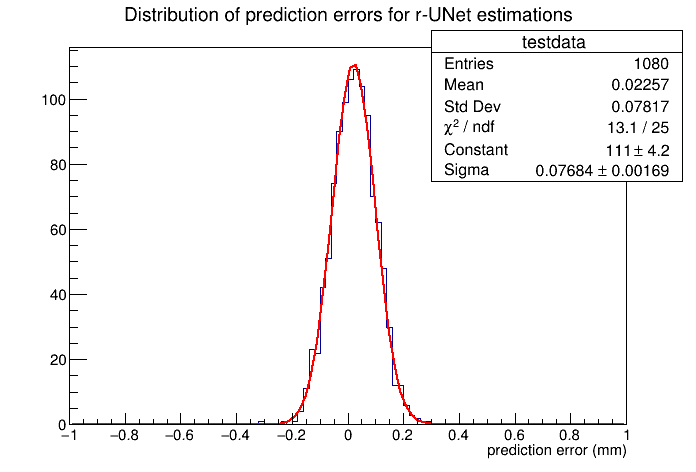

In [12]:
gaus_fit(data_file=data_060_30epochs_testdata, 
        keyword='testdata', 
        fkey='', save_file=False, n_bins=100)

In [31]:
def plot_vs_epochs(coeff, in_key, out_key):
    histos = []
    canvases = []

    f_list, epochs = get_fnames(coeff, in_key)
    for fname, e in zip(f_list, epochs):
        hist=None
        canv=None
        print(fname, e)
        hist, canv = gaus_fit(os.path.join(saved_models, fname), 
                              n_bins=120, save_file=True,
                              keyword=out_key, 
                              fkey='{}_tr6positions_{}coeff_{}epochs'.format(out_key, coeff, e))
        hist.Draw()
        canv.Draw()
        histos.append(hist)
        canvases.append(canv)
    return histos, canvases

predicted_testdata_6positions_5epochs_0.6coeff.npz 5
predicted_testdata_6positions_10epochs_0.6coeff.npz 10
predicted_testdata_6positions_15epochs_0.6coeff.npz 15
predicted_testdata_6positions_20epochs_0.6coeff.npz 20
predicted_testdata_6positions_25epochs_0.6coeff.npz 25
predicted_testdata_6positions_30epochs_0.6coeff.npz 30
predicted_testdata_6positions_35epochs_0.6coeff.npz 35
predicted_testdata_6positions_40epochs_0.6coeff.npz 40
predicted_testdata_6positions_45epochs_0.6coeff.npz 45
predicted_testdata_6positions_50epochs_0.6coeff.npz 50
predicted_testdata_6positions_55epochs_0.6coeff.npz 55
predicted_testdata_6positions_60epochs_0.6coeff.npz 60
predicted_testdata_6positions_65epochs_0.6coeff.npz 65
predicted_testdata_6positions_70epochs_0.6coeff.npz 70
predicted_testdata_6positions_75epochs_0.6coeff.npz 75
predicted_testdata_6positions_80epochs_0.6coeff.npz 80
predicted_testdata_6positions_85epochs_0.6coeff.npz 85
predicted_testdata_6positions_90epochs_0.6coeff.npz 90
predicted_te

Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_test_data_tr6positions_6coeff_5epochs.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: test_data (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_test_data_tr6positions_6coeff_10epochs.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: test_data (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_test_data_tr6positions_6coeff_15epochs.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: test_data (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_test_data_tr

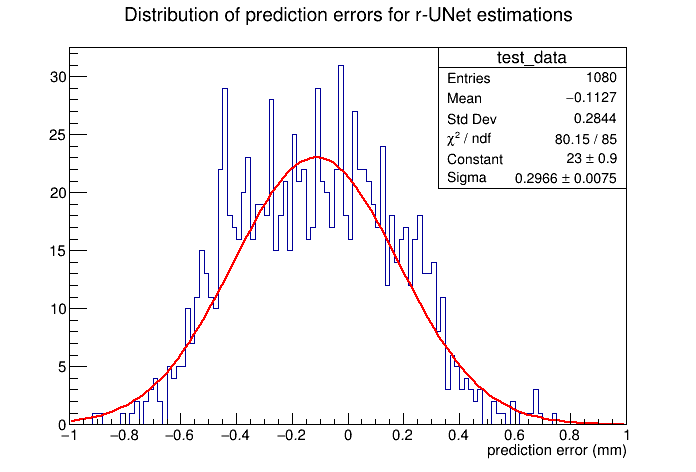

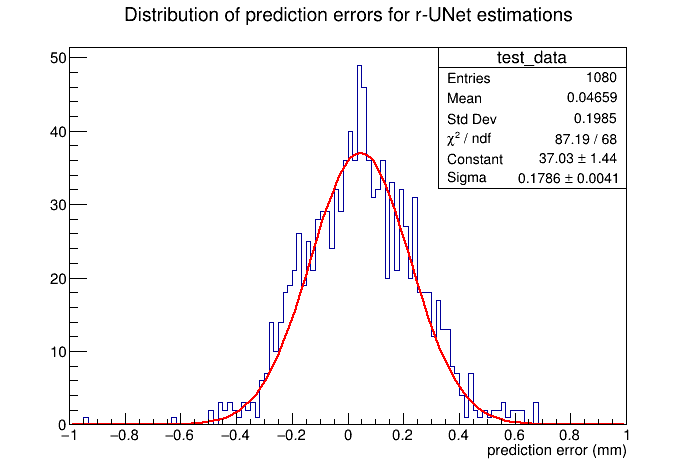

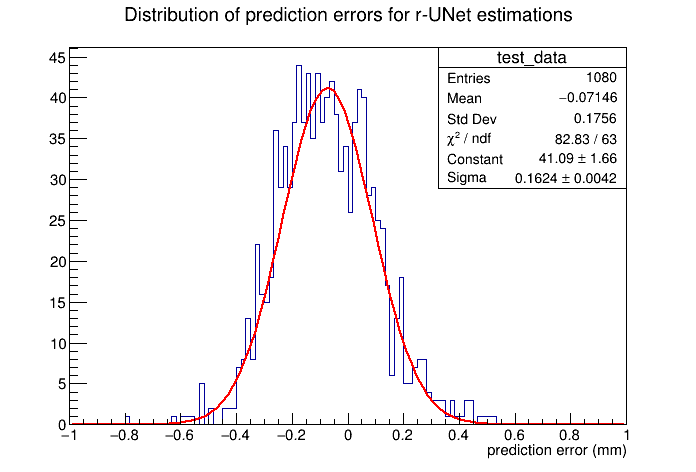

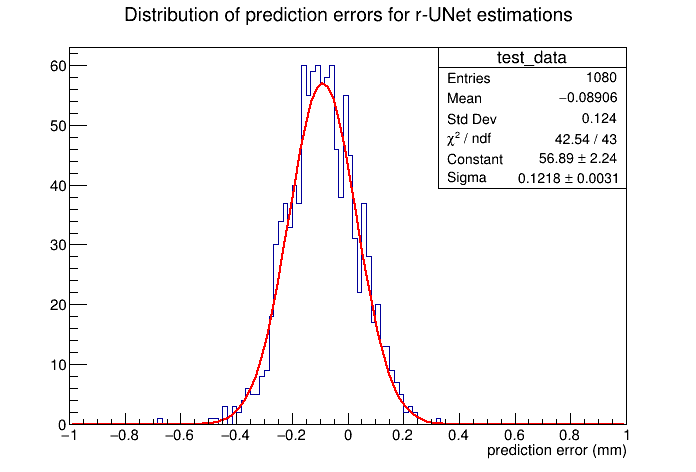

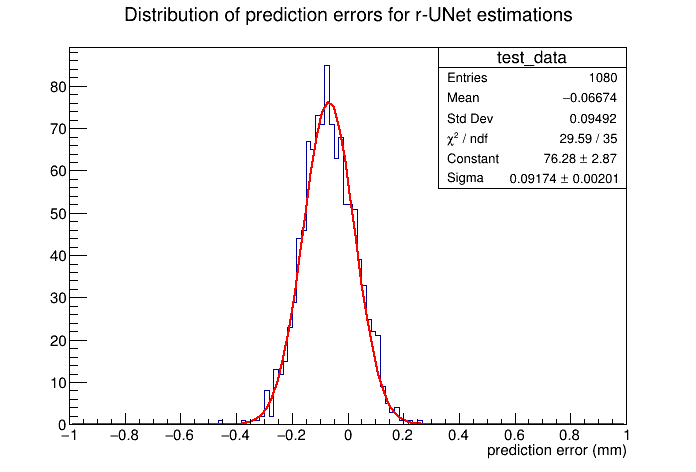

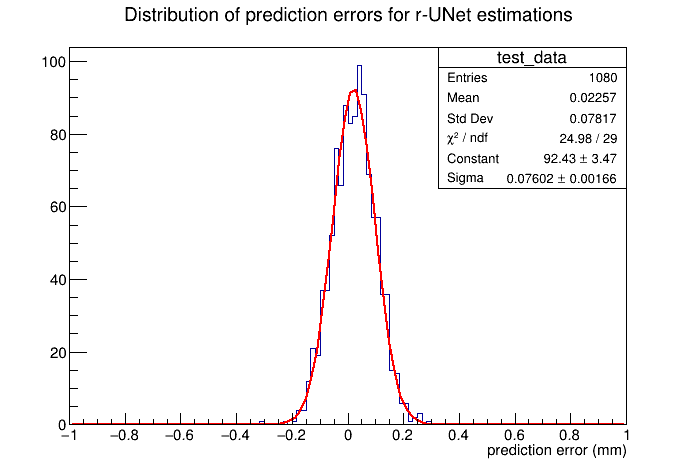

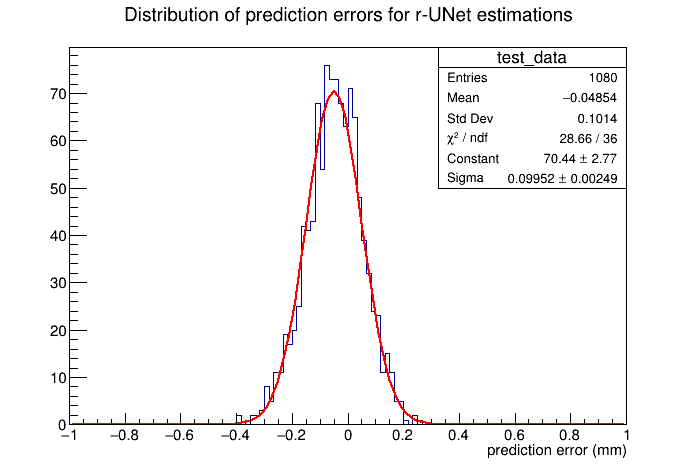

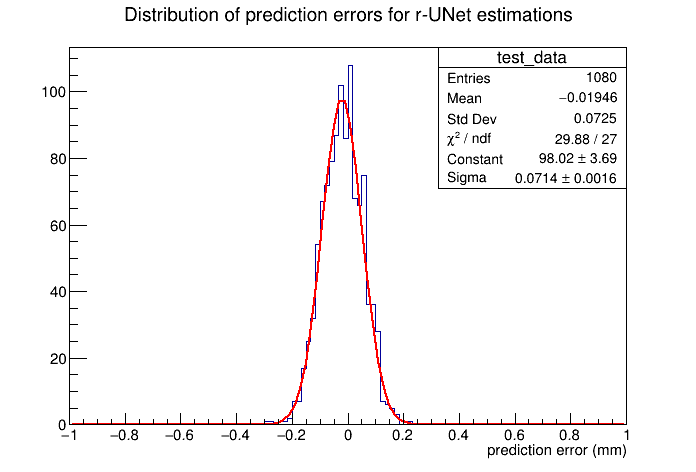

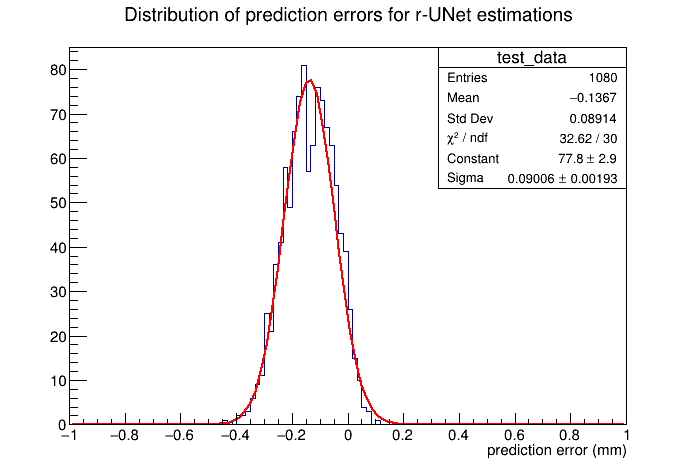

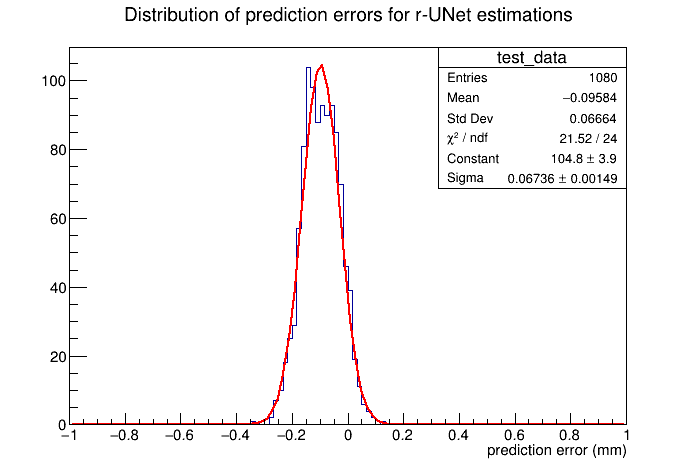

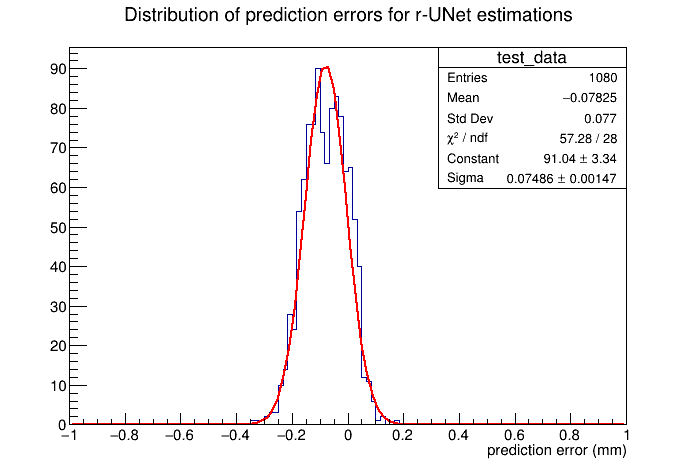

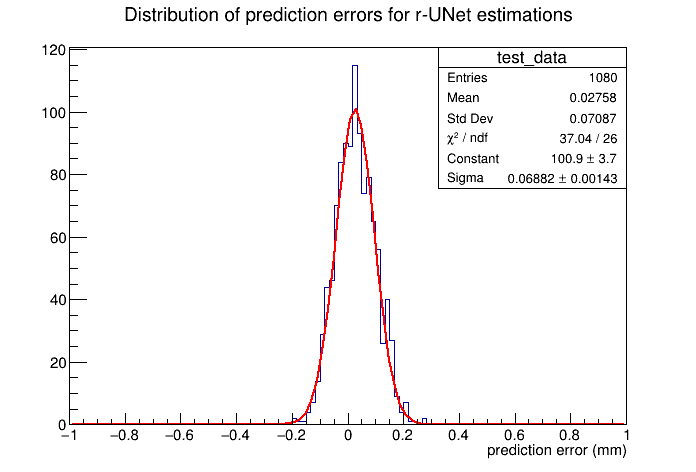

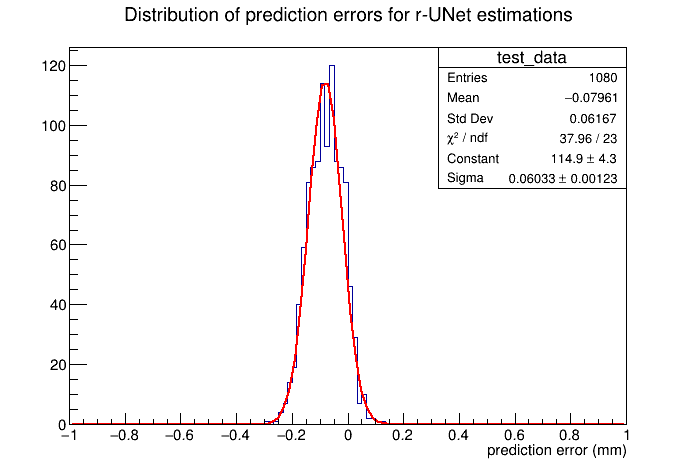

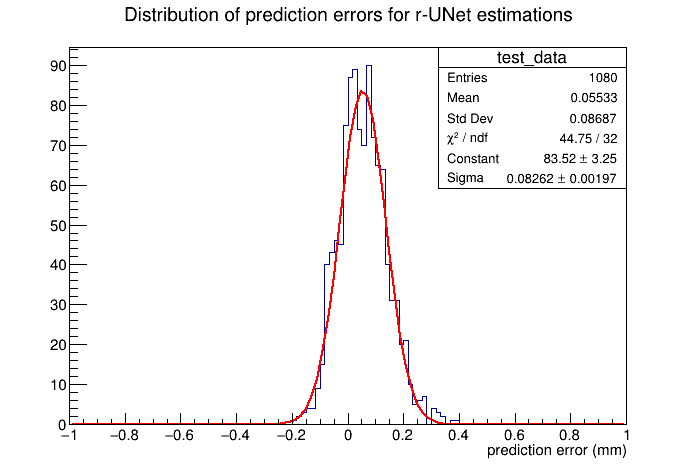

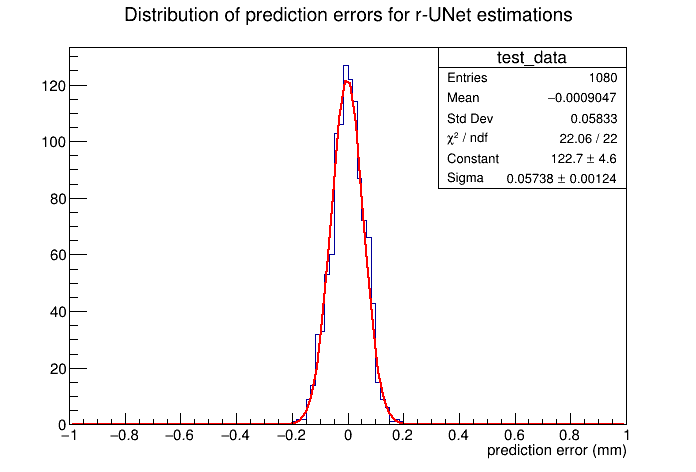

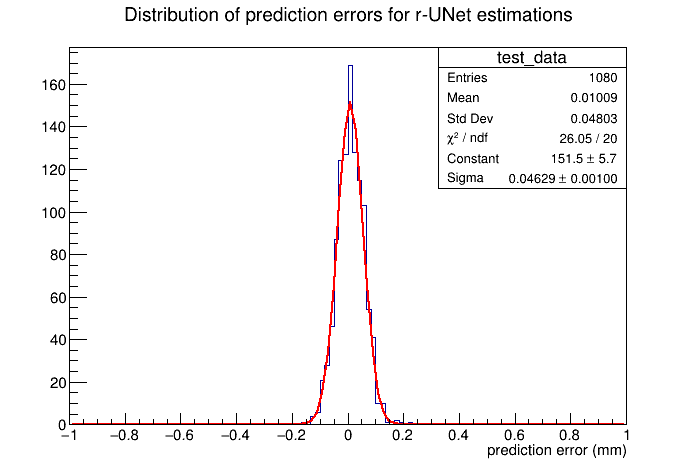

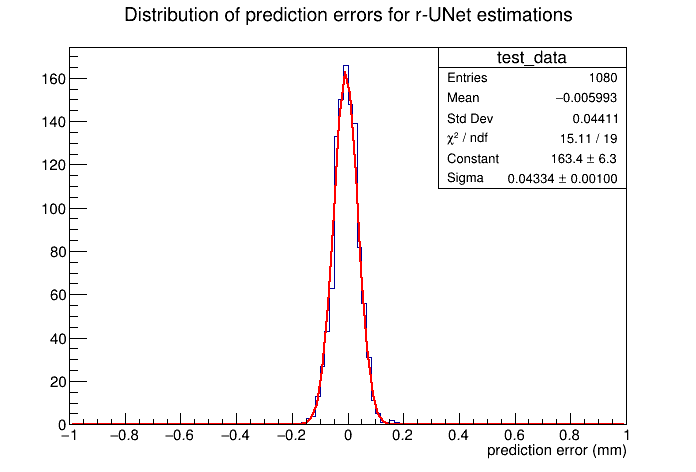

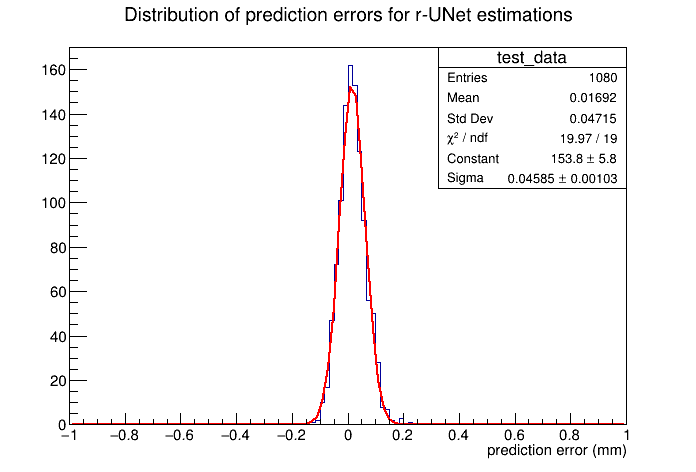

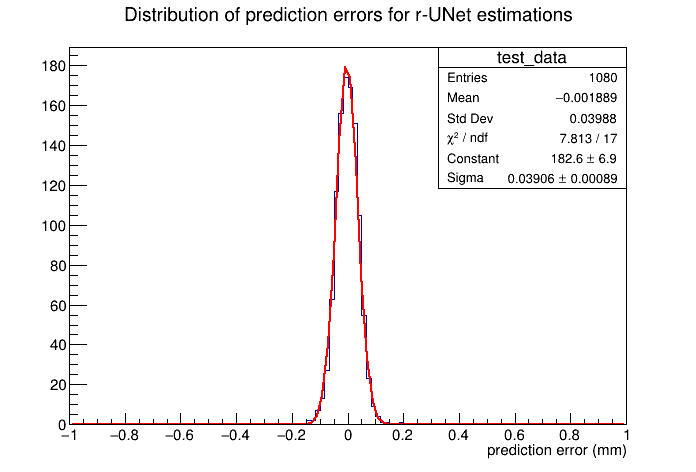

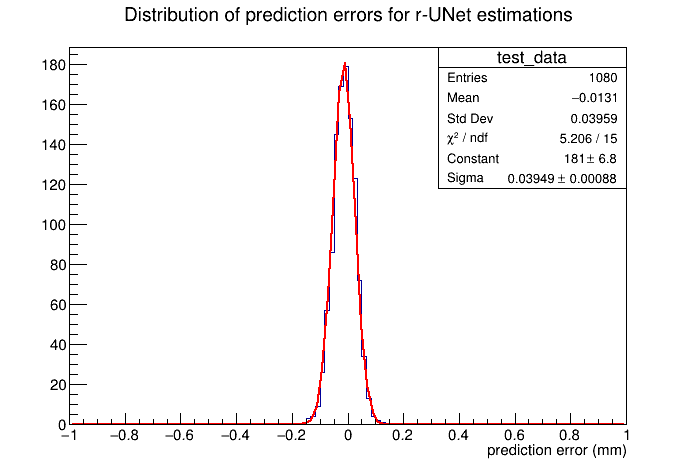

In [14]:
h, c = plot_vs_epochs(6, in_key = 'testdata', out_key ='test_data')

predicted_unseen_6positions_5epochs_0.6coeff.npz 5
predicted_unseen_6positions_10epochs_0.6coeff.npz 10
predicted_unseen_6positions_15epochs_0.6coeff.npz 15
predicted_unseen_6positions_20epochs_0.6coeff.npz 20
predicted_unseen_6positions_25epochs_0.6coeff.npz 25
predicted_unseen_6positions_30epochs_0.6coeff.npz 30
predicted_unseen_6positions_35epochs_0.6coeff.npz 35
predicted_unseen_6positions_40epochs_0.6coeff.npz 40
predicted_unseen_6positions_45epochs_0.6coeff.npz 45
predicted_unseen_6positions_50epochs_0.6coeff.npz 50
predicted_unseen_6positions_55epochs_0.6coeff.npz 55
predicted_unseen_6positions_60epochs_0.6coeff.npz 60
predicted_unseen_6positions_65epochs_0.6coeff.npz 65
predicted_unseen_6positions_70epochs_0.6coeff.npz 70
predicted_unseen_6positions_75epochs_0.6coeff.npz 75
predicted_unseen_6positions_80epochs_0.6coeff.npz 80
predicted_unseen_6positions_85epochs_0.6coeff.npz 85
predicted_unseen_6positions_90epochs_0.6coeff.npz 90
predicted_unseen_6positions_95epochs_0.6coeff.np

Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_unseen_data_tr6positions_6coeff_5epochs.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: unseen_data (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_unseen_data_tr6positions_6coeff_10epochs.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: unseen_data (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_unseen_data_tr6positions_6coeff_15epochs.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: unseen_data (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_

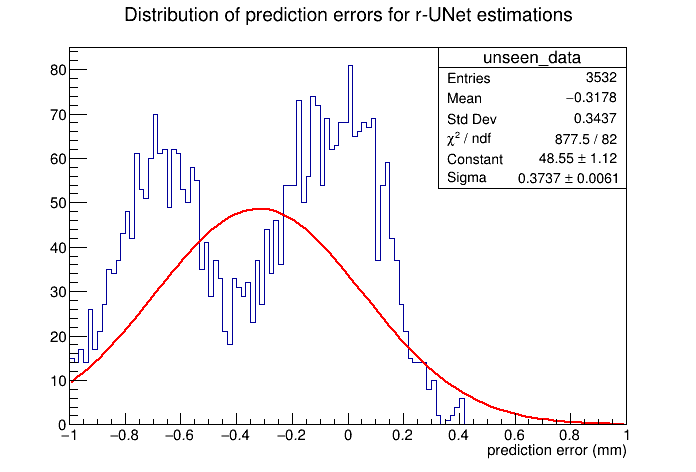

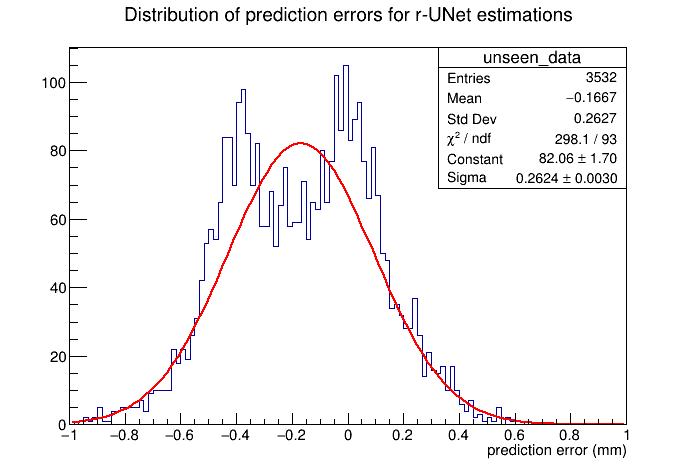

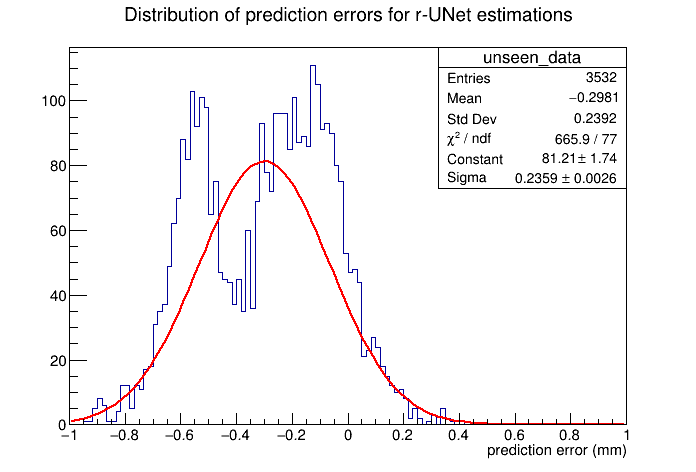

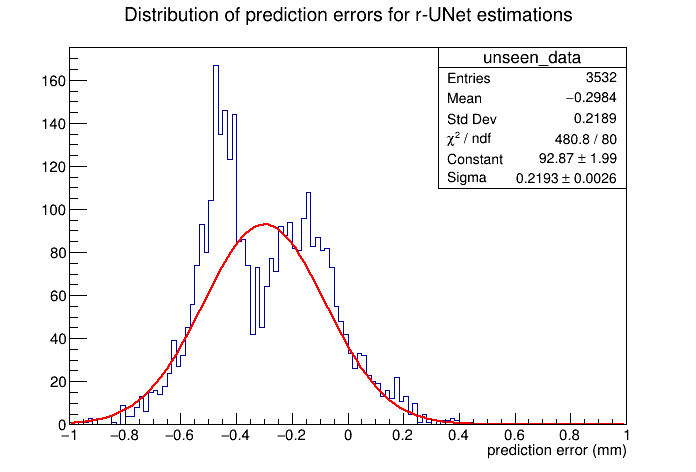

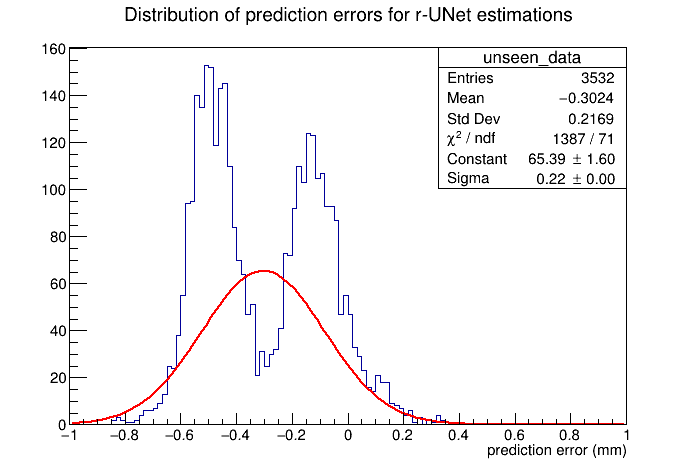

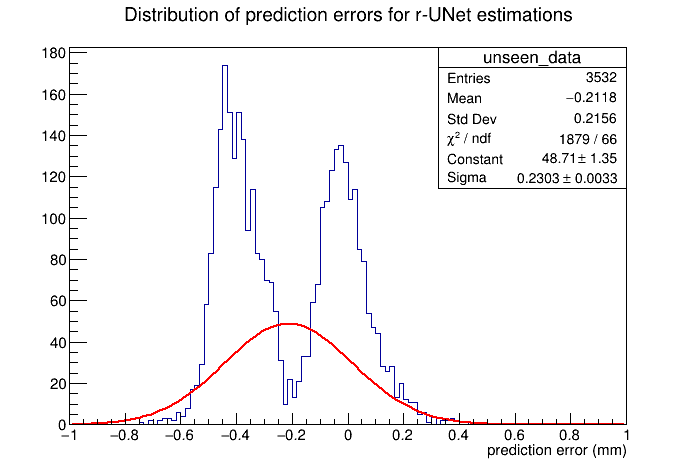

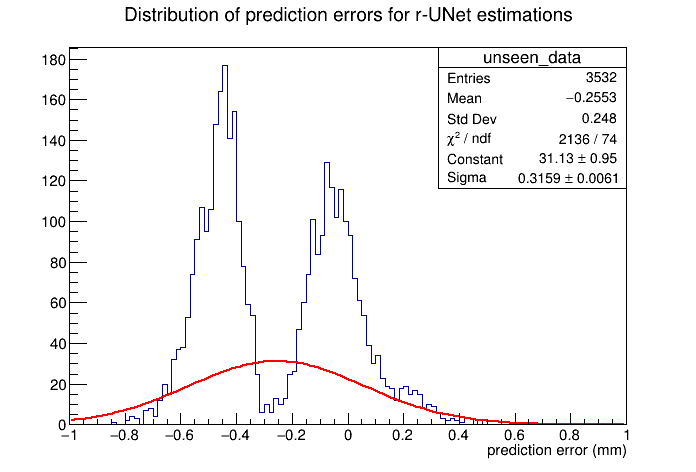

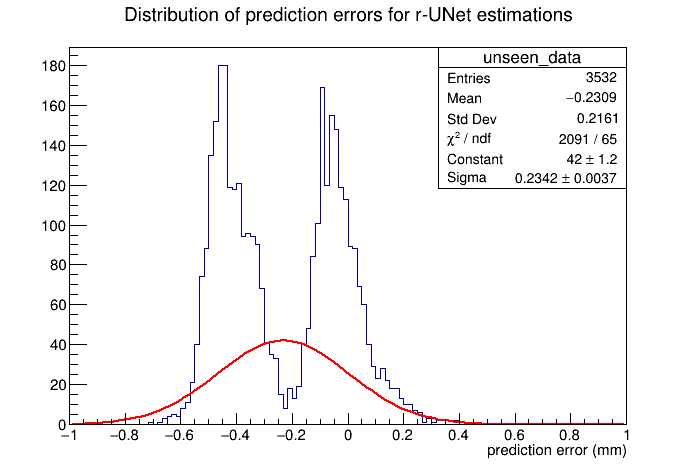

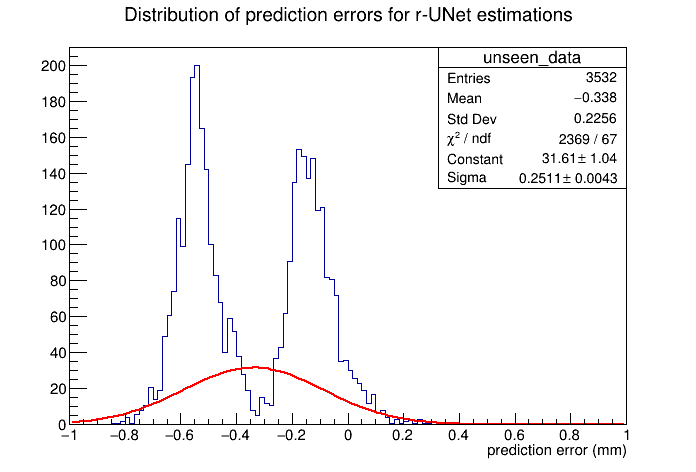

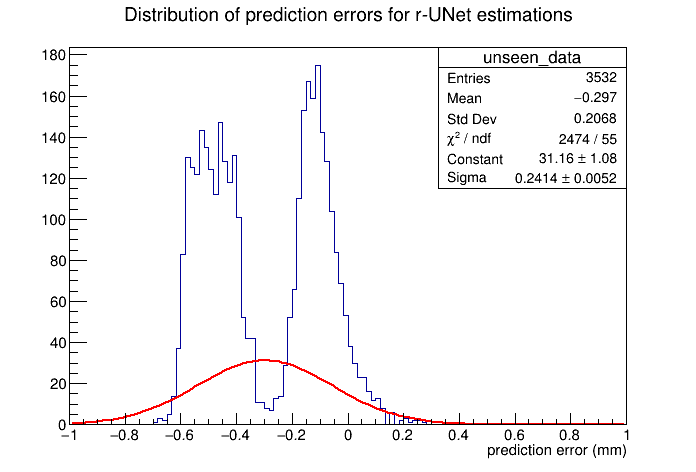

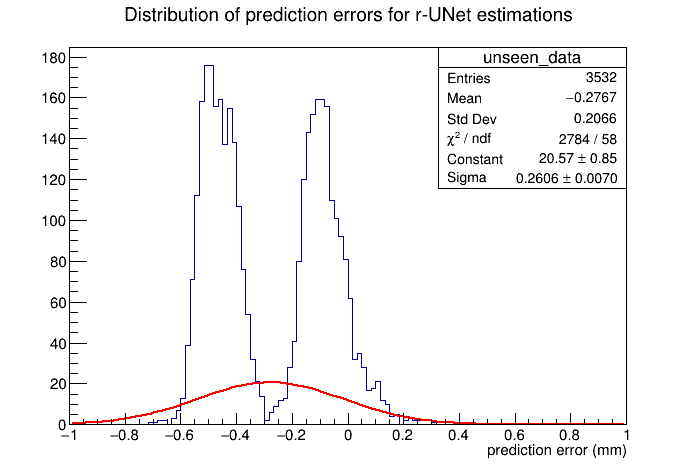

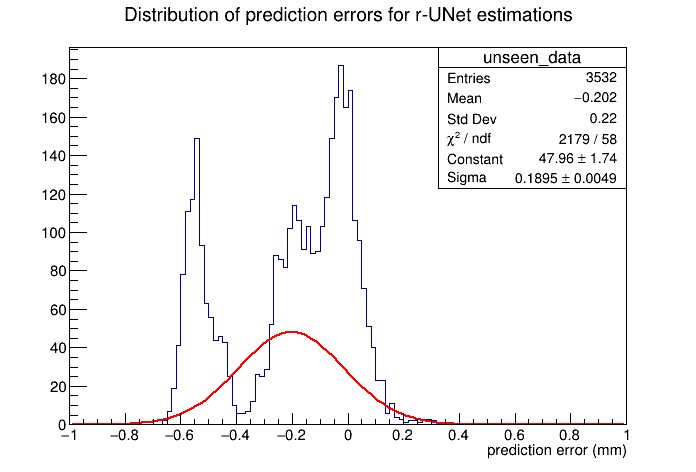

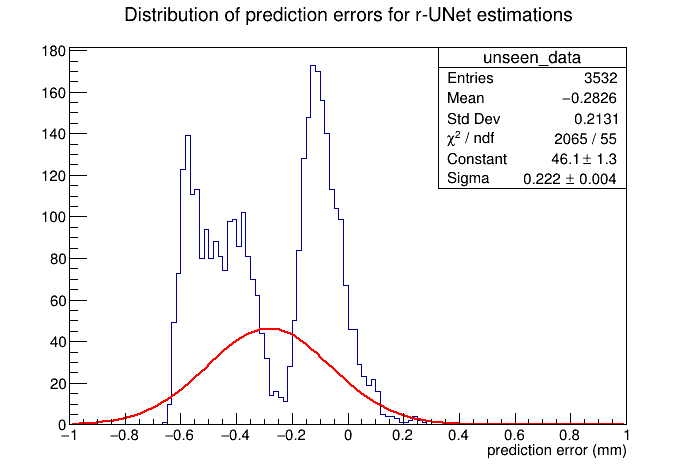

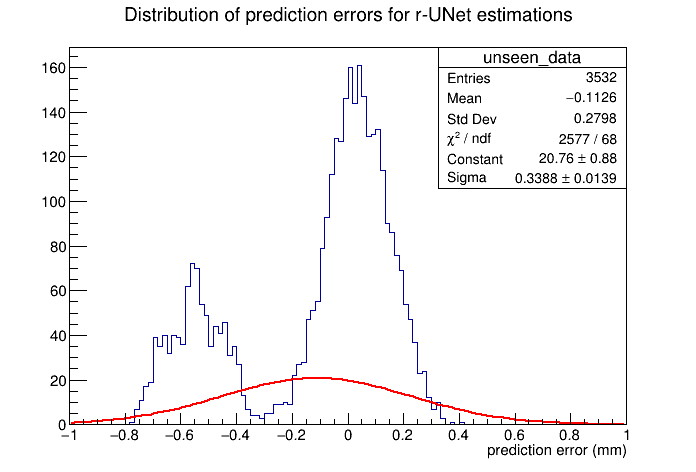

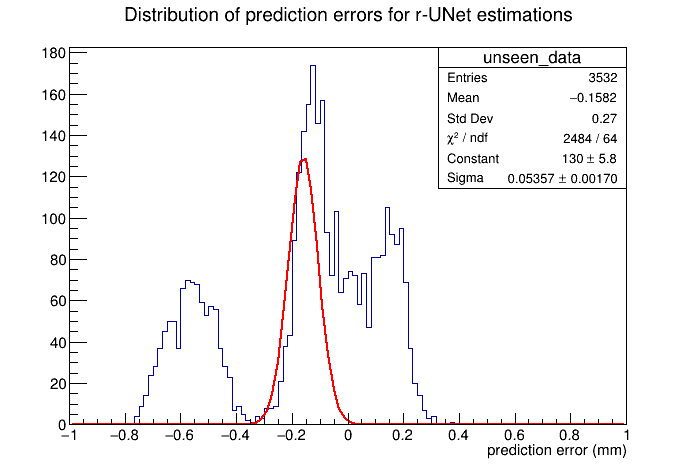

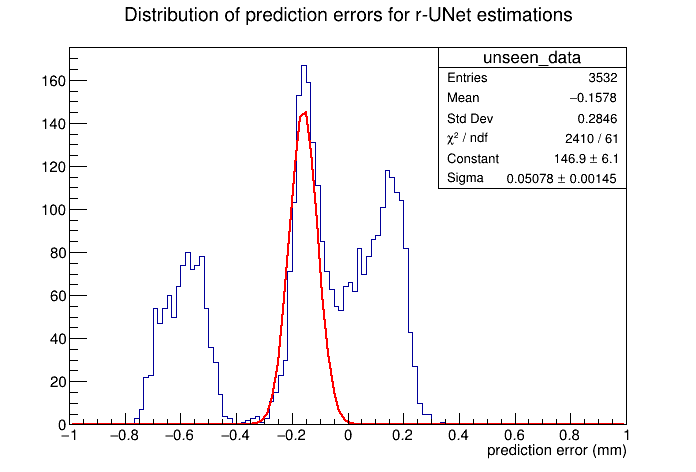

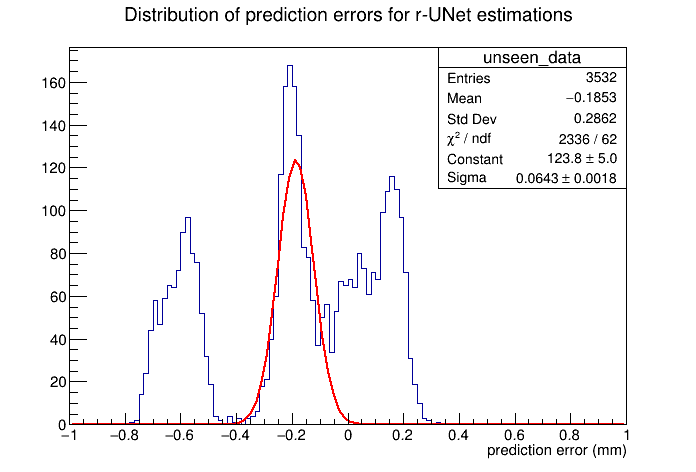

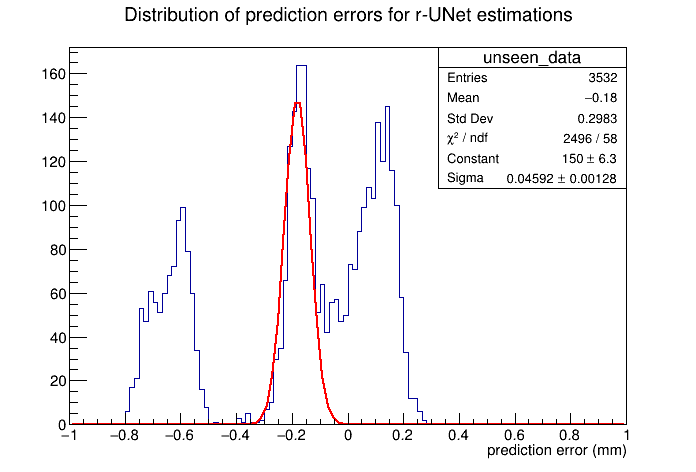

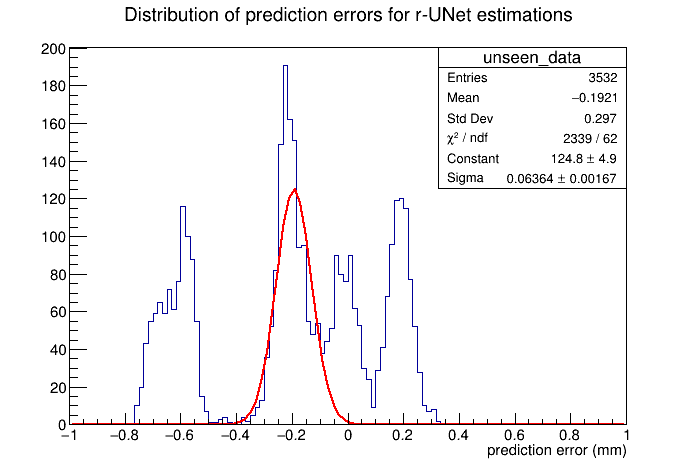

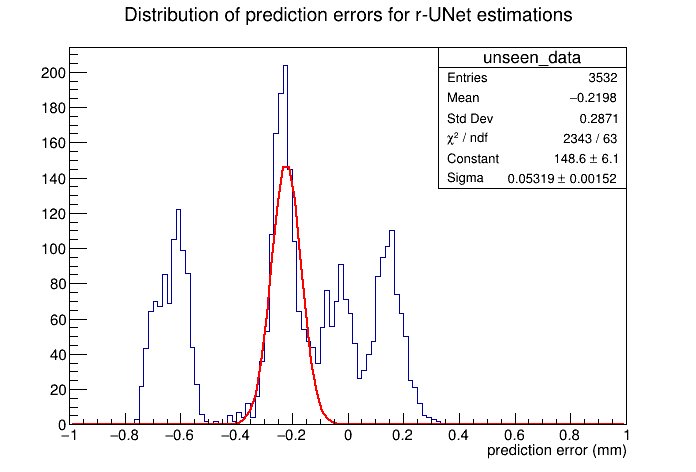

In [15]:
h, c = plot_vs_epochs(6, in_key='unseen', out_key = 'unseen_data')

predicted_testdata_6positions_5epochs_0.7coeff.npz 5
predicted_testdata_6positions_10epochs_0.7coeff.npz 10
predicted_testdata_6positions_15epochs_0.7coeff.npz 15
predicted_testdata_6positions_20epochs_0.7coeff.npz 20
predicted_testdata_6positions_25epochs_0.7coeff.npz 25
predicted_testdata_6positions_30epochs_0.7coeff.npz 30
predicted_testdata_6positions_35epochs_0.7coeff.npz 35
predicted_testdata_6positions_40epochs_0.7coeff.npz 40
predicted_testdata_6positions_45epochs_0.7coeff.npz 45
predicted_testdata_6positions_50epochs_0.7coeff.npz 50
 FCN=151.337 FROM MIGRAD    STATUS=CONVERGED      45 CALLS          46 TOTAL
                     EDM=1.79814e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.53265e+01   6.28582e-01   3.03764e-03   1.11943e-04
   2  Mean         6.86183e-03     fixed    
   3  Sigma        4.16384e-01   

Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_test_data_tr6positions_7coeff_5epochs.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: test_data (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_test_data_tr6positions_7coeff_10epochs.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: test_data (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_test_data_tr6positions_7coeff_15epochs.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: test_data (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_test_data_tr

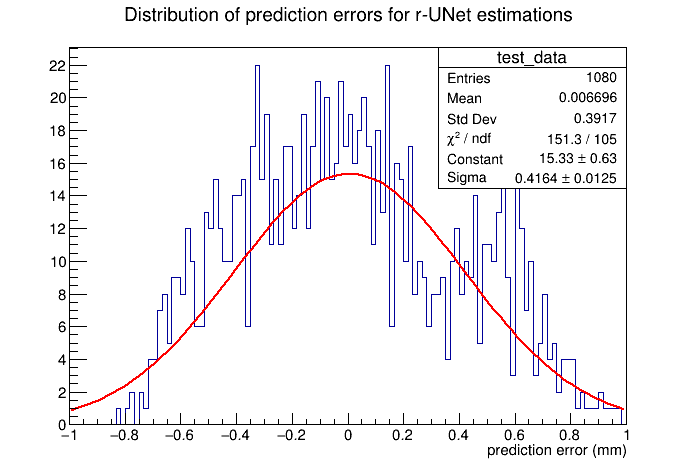

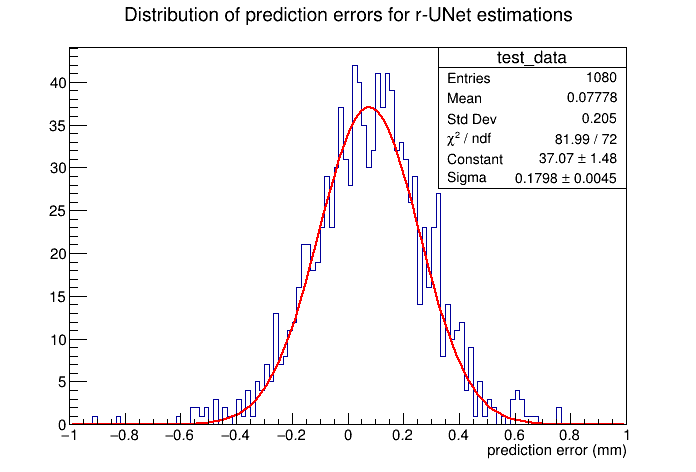

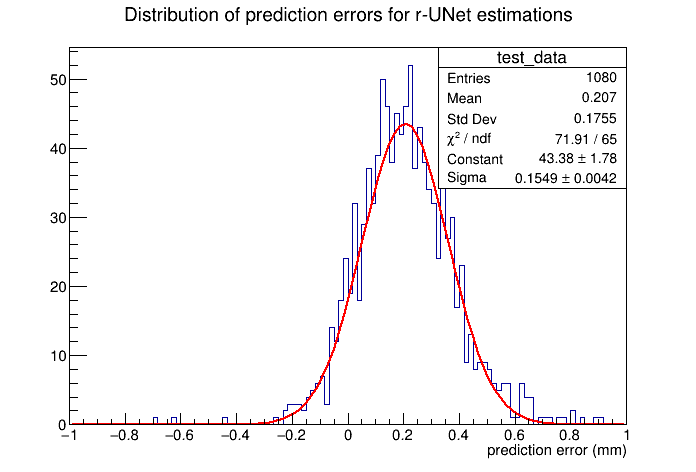

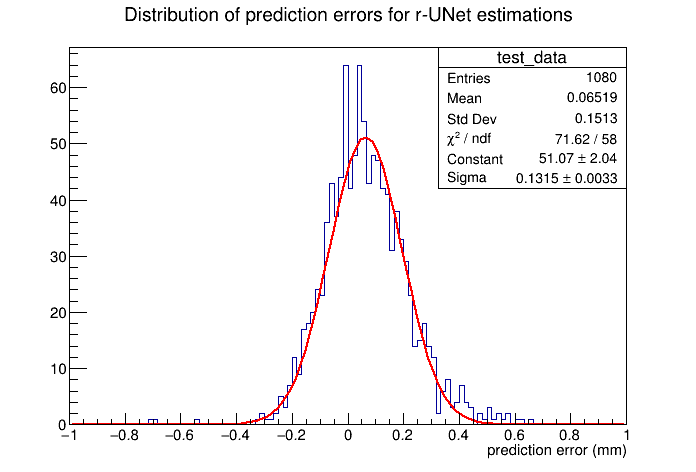

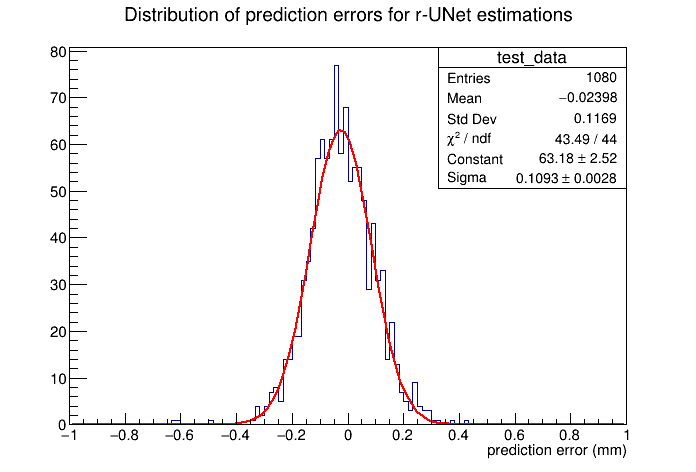

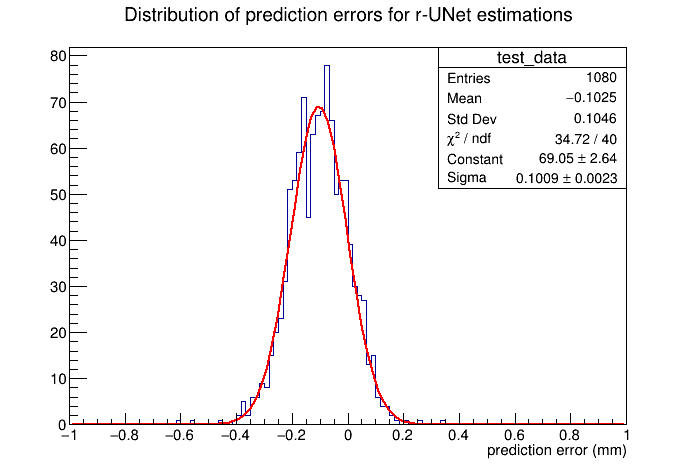

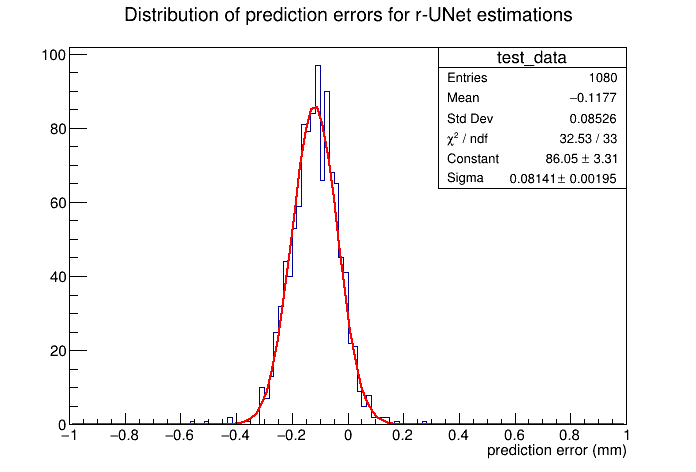

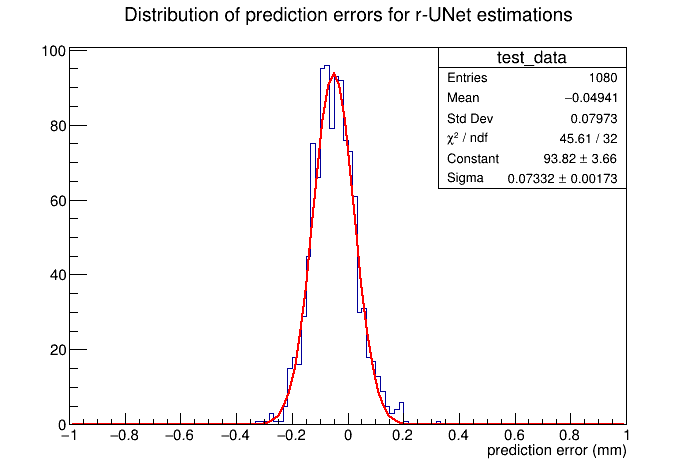

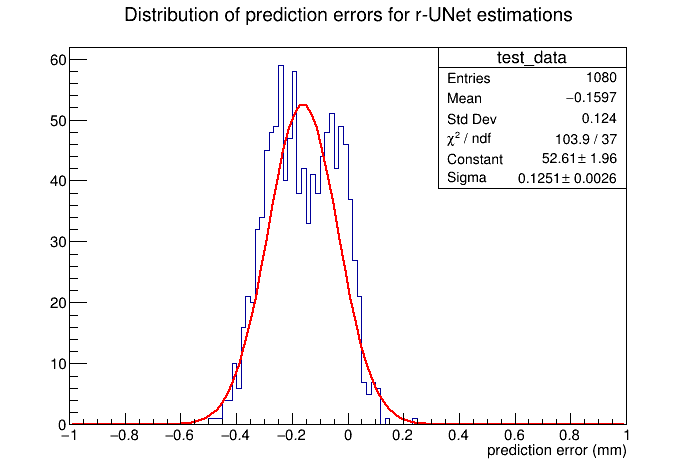

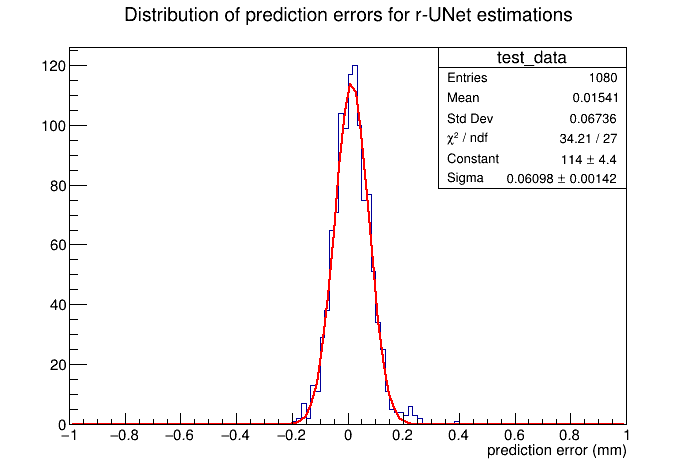

In [68]:
h, c = plot_vs_epochs(7, in_key='testdata', out_key='test_data')

predicted_unseen_6positions_5epochs_0.7coeff.npz 5
predicted_unseen_6positions_10epochs_0.7coeff.npz 10
predicted_unseen_6positions_15epochs_0.7coeff.npz 15
predicted_unseen_6positions_20epochs_0.7coeff.npz 20
predicted_unseen_6positions_25epochs_0.7coeff.npz 25
predicted_unseen_6positions_30epochs_0.7coeff.npz 30
predicted_unseen_6positions_35epochs_0.7coeff.npz 35
predicted_unseen_6positions_40epochs_0.7coeff.npz 40
predicted_unseen_6positions_45epochs_0.7coeff.npz 45
predicted_unseen_6positions_50epochs_0.7coeff.npz 50
 FCN=791.066 FROM MIGRAD    STATUS=CONVERGED      46 CALLS          47 TOTAL
                     EDM=9.39549e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.12466e+01   9.61264e-01   1.12052e-02   3.08990e-05
   2  Mean        -2.36378e-01     fixed    
   3  Sigma        4.36503e-01   7.13577e-03   6.3215

Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_unseen_data_tr6positions_7coeff_5epochs.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: unseen_data (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_unseen_data_tr6positions_7coeff_10epochs.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: unseen_data (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_unseen_data_tr6positions_7coeff_15epochs.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: unseen_data (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_

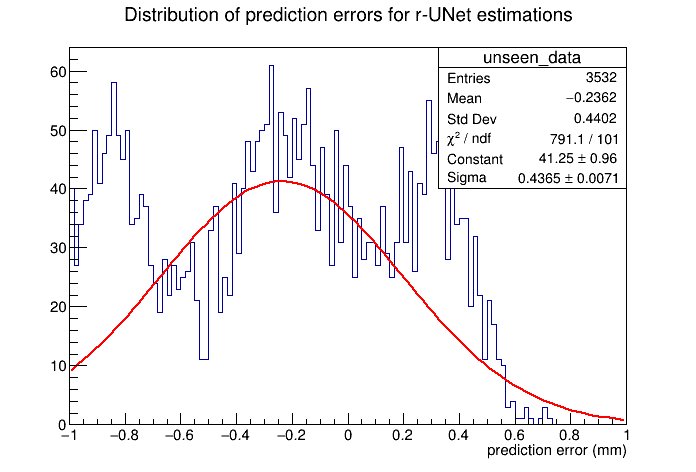

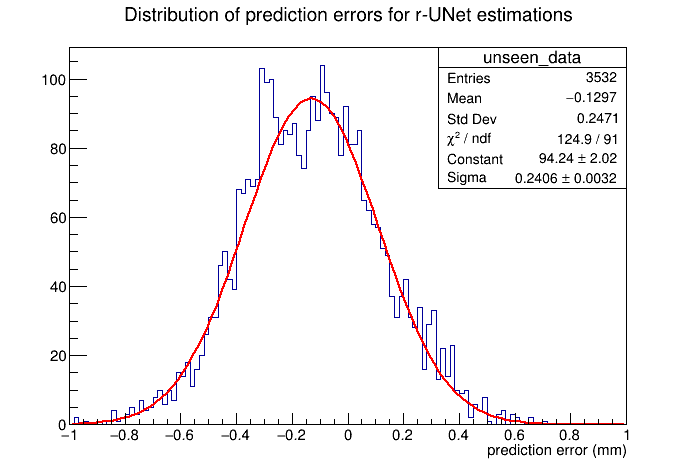

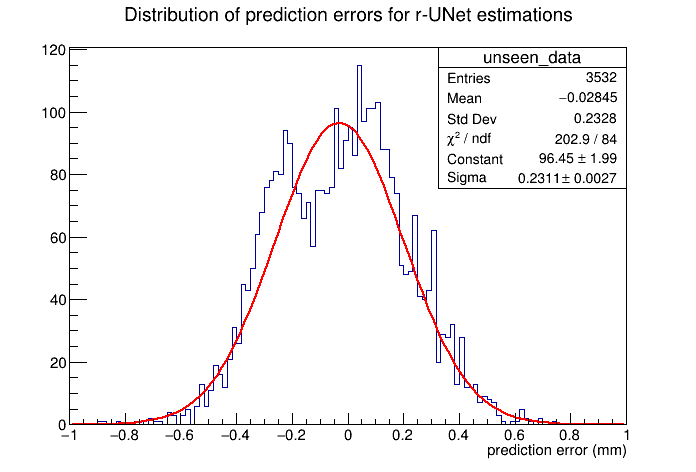

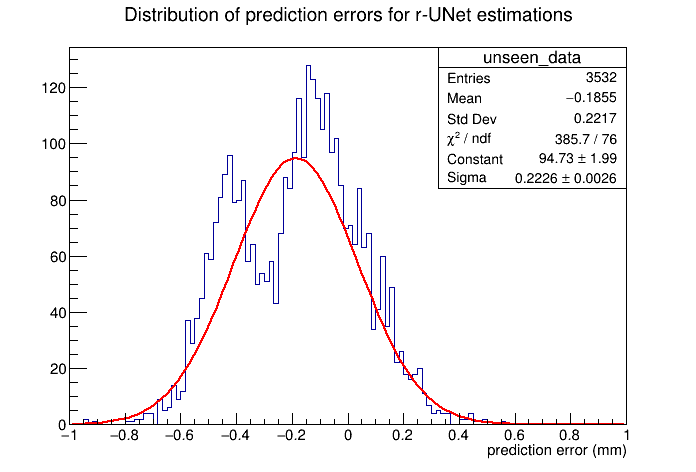

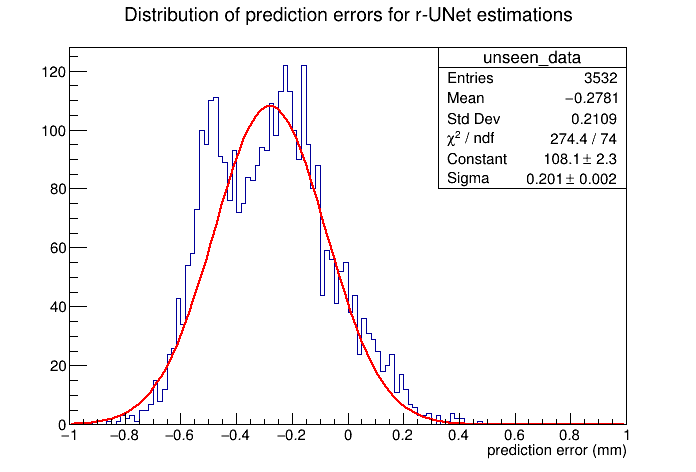

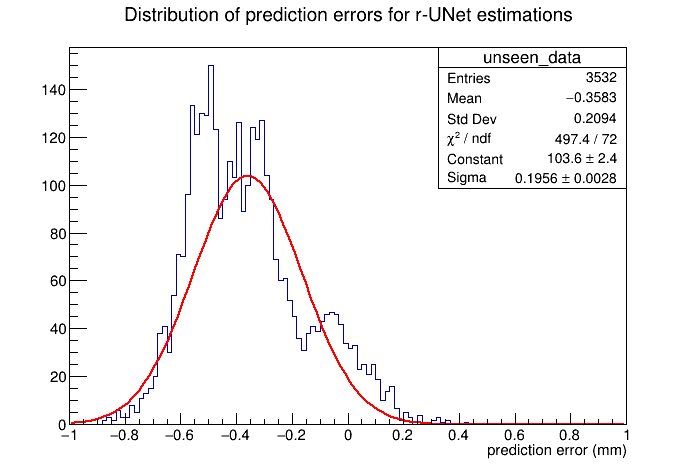

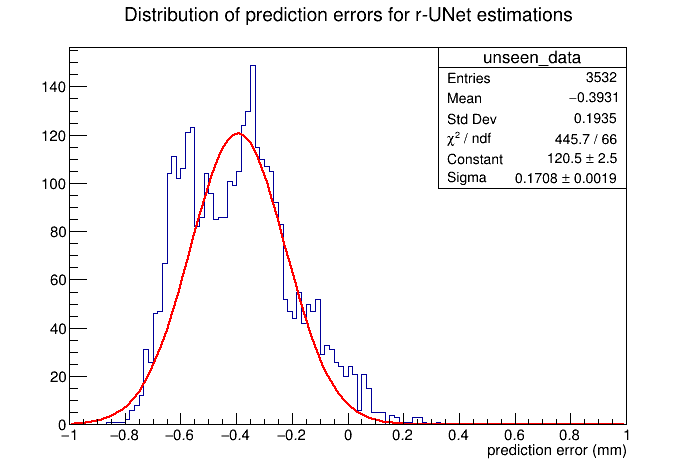

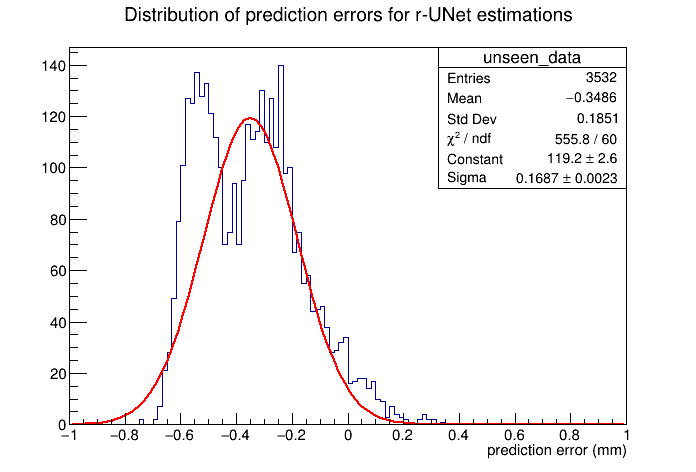

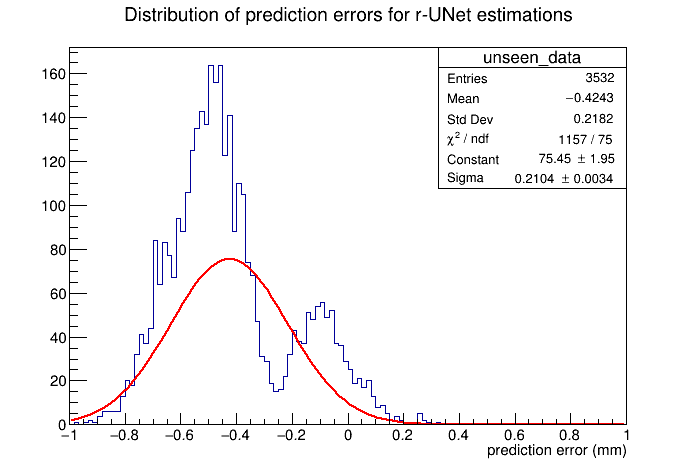

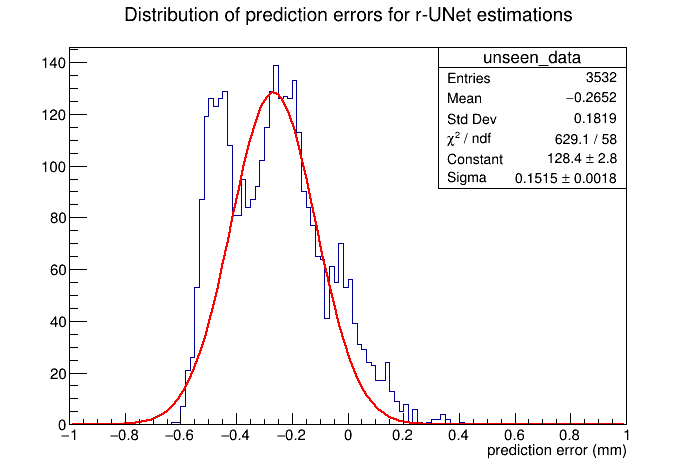

In [69]:
h, c = plot_vs_epochs(7, in_key = 'unseen', out_key='unseen_data')

predicted_testdata_6positions_5epochs_0.75coeff.npz 5
predicted_testdata_6positions_10epochs_0.75coeff.npz 10
predicted_testdata_6positions_15epochs_0.75coeff.npz 15
predicted_testdata_6positions_20epochs_0.75coeff.npz 20
predicted_testdata_6positions_25epochs_0.75coeff.npz 25
predicted_testdata_6positions_30epochs_0.75coeff.npz 30
predicted_testdata_6positions_35epochs_0.75coeff.npz 35
predicted_testdata_6positions_40epochs_0.75coeff.npz 40
predicted_testdata_6positions_45epochs_0.75coeff.npz 45
predicted_testdata_6positions_50epochs_0.75coeff.npz 50
 FCN=129.924 FROM MIGRAD    STATUS=CONVERGED      48 CALLS          49 TOTAL
                     EDM=9.35268e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.99068e+01   8.02897e-01   3.60883e-03   2.62251e-04
   2  Mean         2.58951e-02     fixed    
   3  Sigma        3.22

Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_test_data_tr6positions_75coeff_5epochs.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: test_data (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_test_data_tr6positions_75coeff_10epochs.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: test_data (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_test_data_tr6positions_75coeff_15epochs.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: test_data (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_test_data

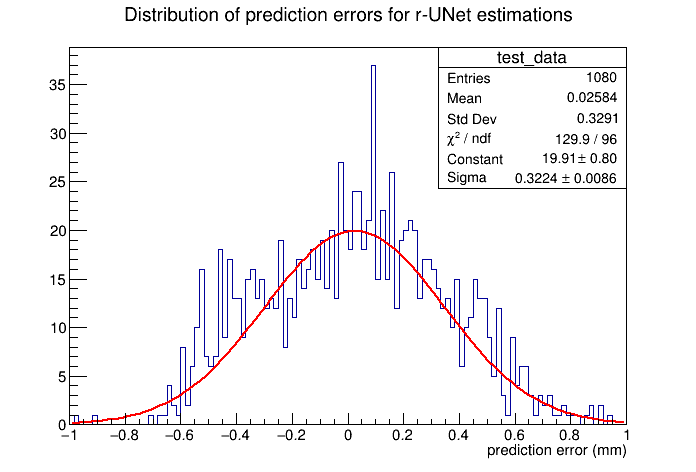

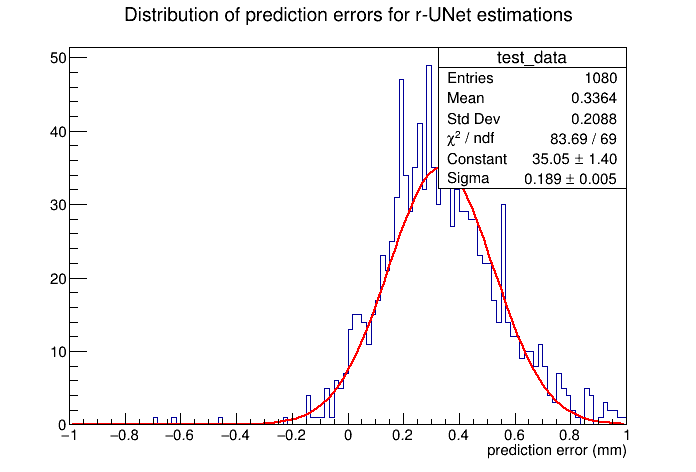

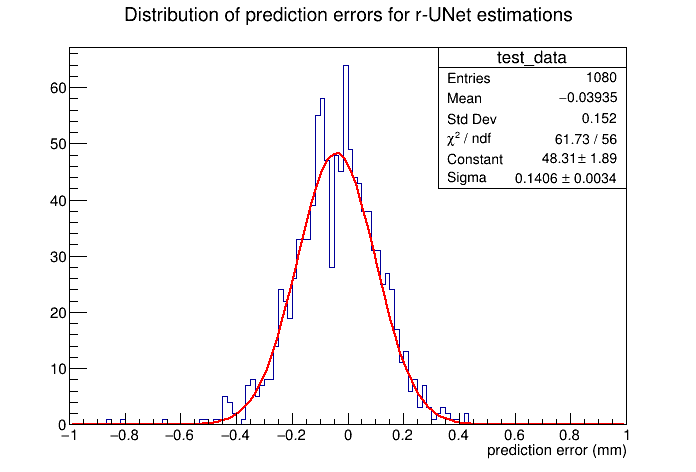

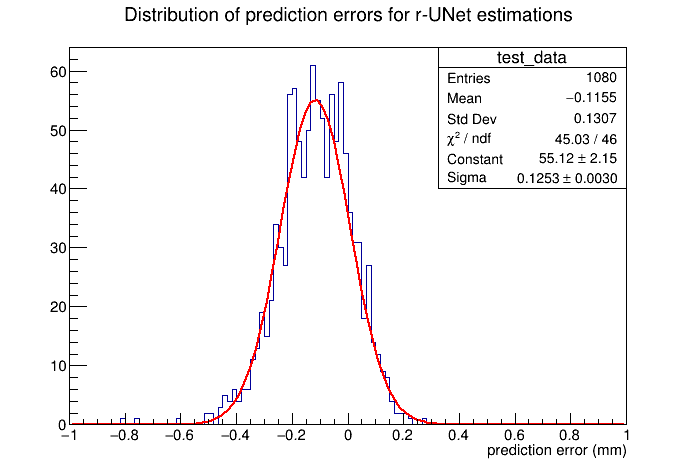

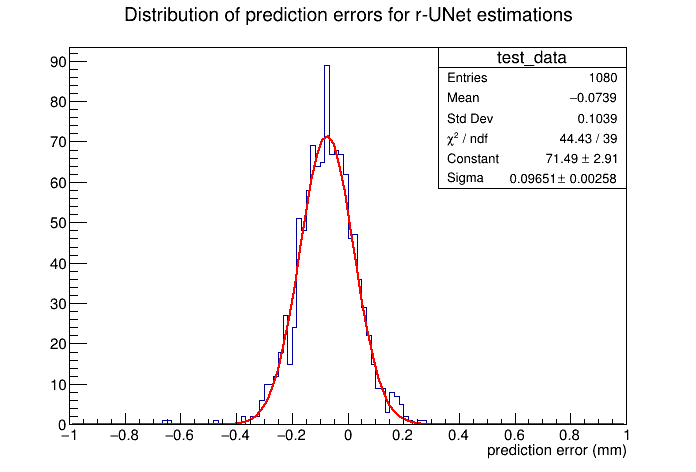

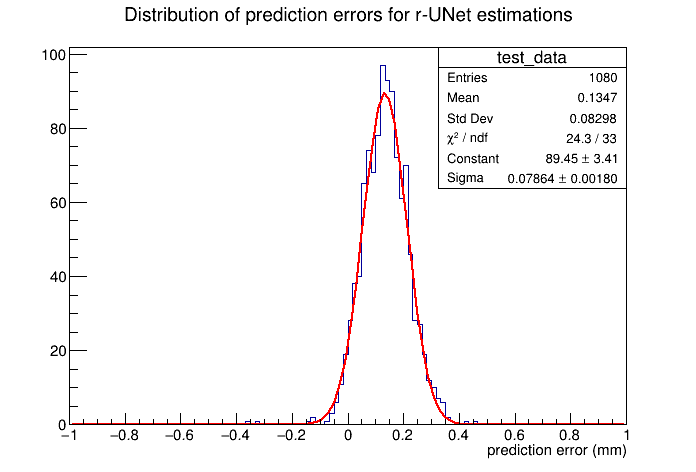

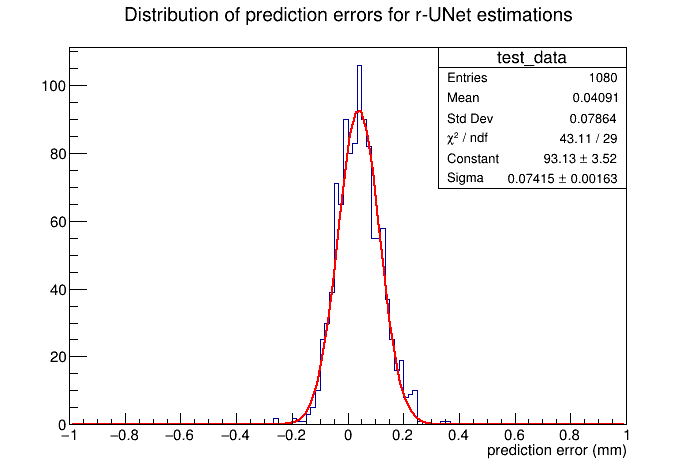

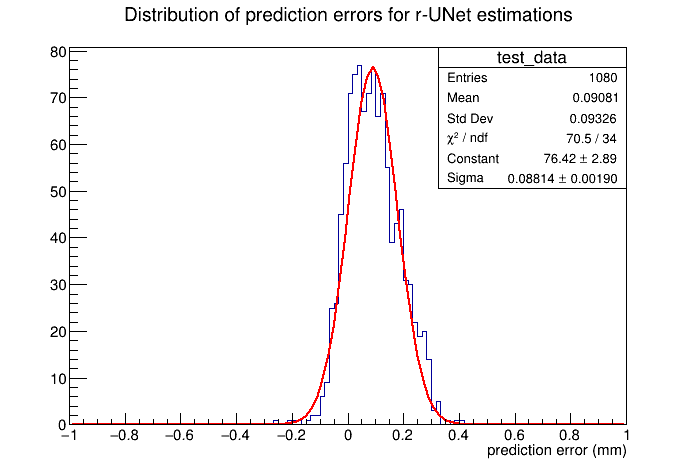

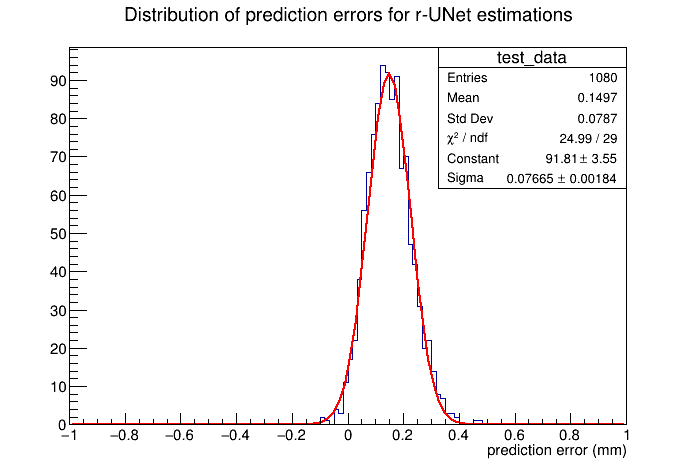

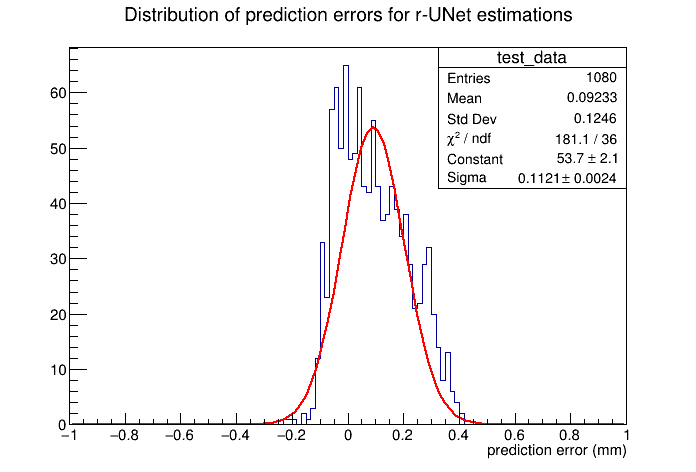

In [70]:
h, c = plot_vs_epochs(75, in_key='testdata', out_key='test_data')

predicted_unseen_6positions_5epochs_0.75coeff.npz 5
predicted_unseen_6positions_10epochs_0.75coeff.npz 10
predicted_unseen_6positions_15epochs_0.75coeff.npz 15
predicted_unseen_6positions_20epochs_0.75coeff.npz 20
predicted_unseen_6positions_25epochs_0.75coeff.npz 25
predicted_unseen_6positions_30epochs_0.75coeff.npz 30
predicted_unseen_6positions_35epochs_0.75coeff.npz 35
predicted_unseen_6positions_40epochs_0.75coeff.npz 40
predicted_unseen_6positions_45epochs_0.75coeff.npz 45
predicted_unseen_6positions_50epochs_0.75coeff.npz 50
 FCN=1161.23 FROM MIGRAD    STATUS=CONVERGED      50 CALLS          51 TOTAL
                     EDM=3.94067e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.90261e+01   9.62257e-01   1.35562e-02   2.18086e-04
   2  Mean        -2.54410e-01     fixed    
   3  Sigma        4.15517e-01   7.40805e-0

Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_unseen_data_tr6positions_75coeff_5epochs.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: unseen_data (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_unseen_data_tr6positions_75coeff_10epochs.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: unseen_data (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_unseen_data_tr6positions_75coeff_15epochs.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: unseen_data (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distributi

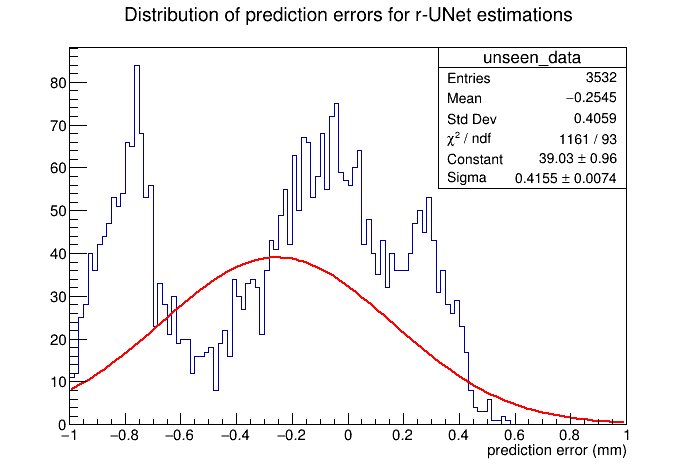

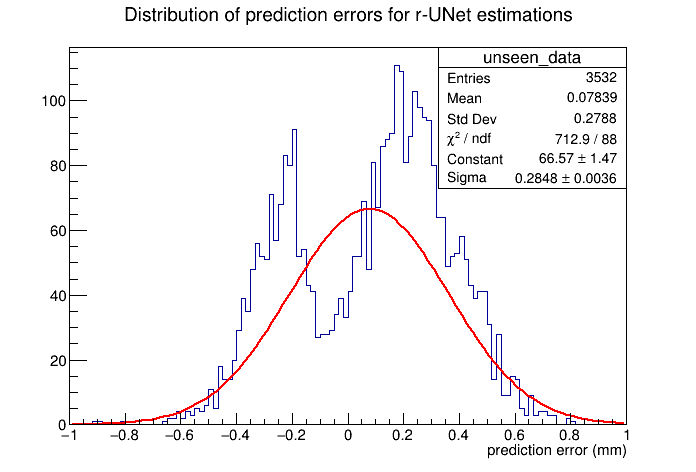

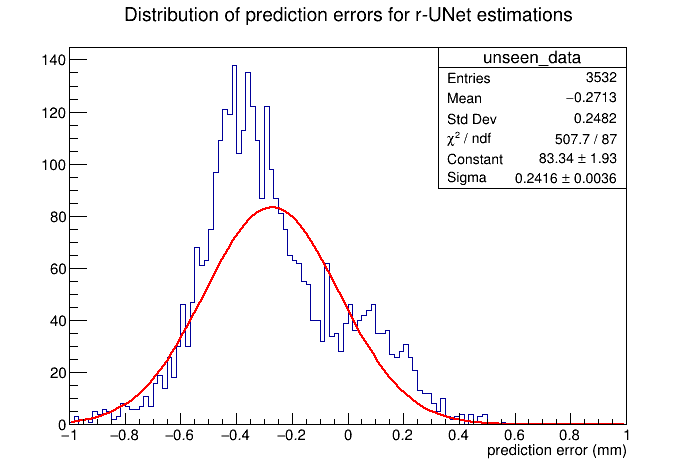

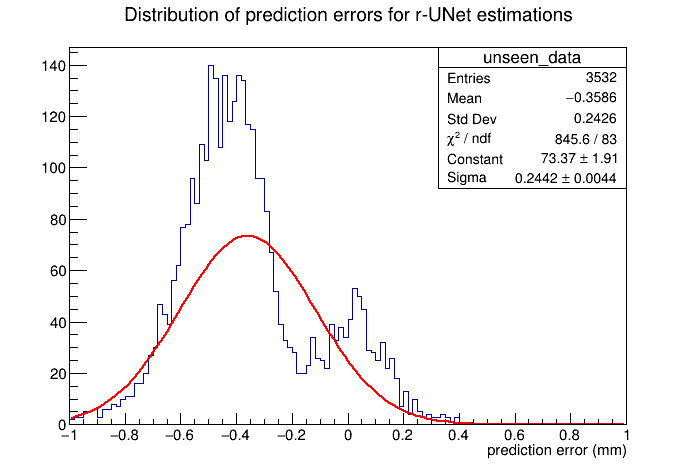

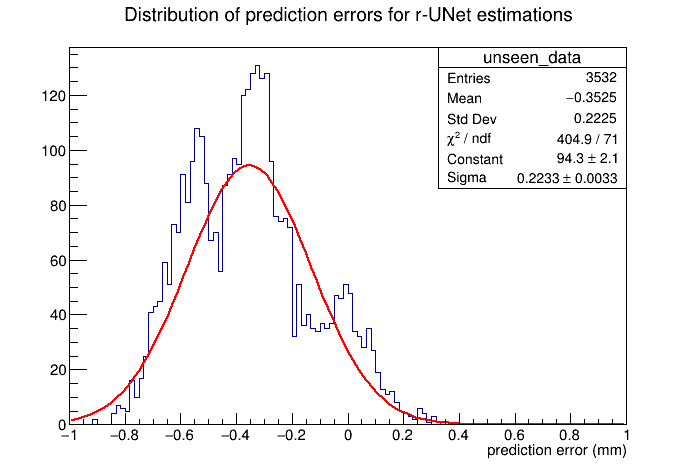

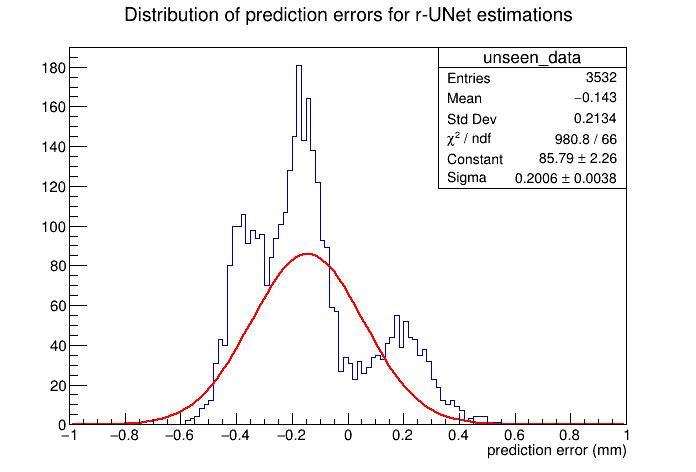

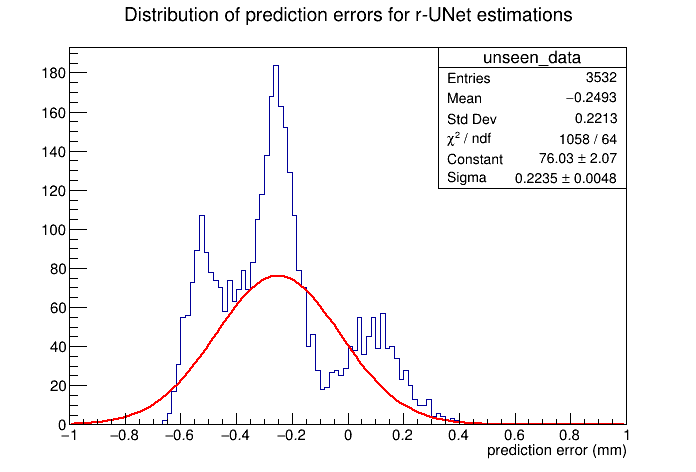

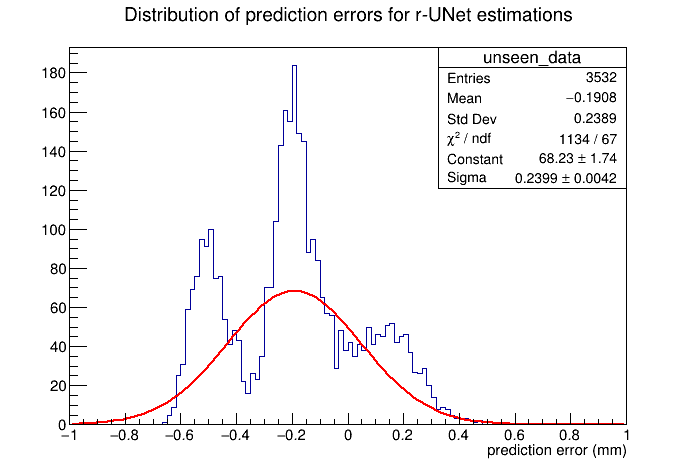

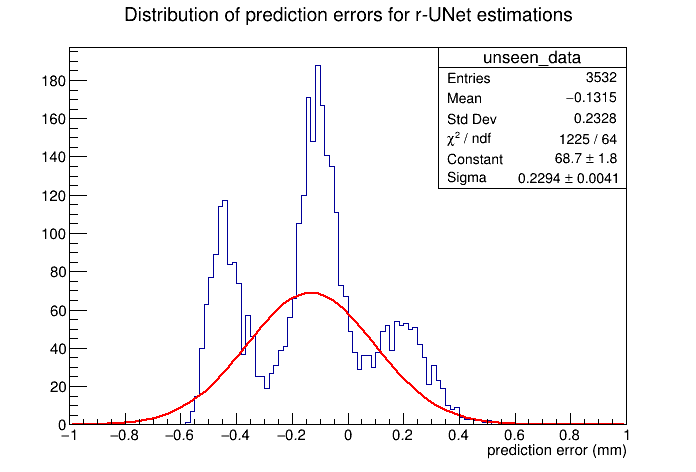

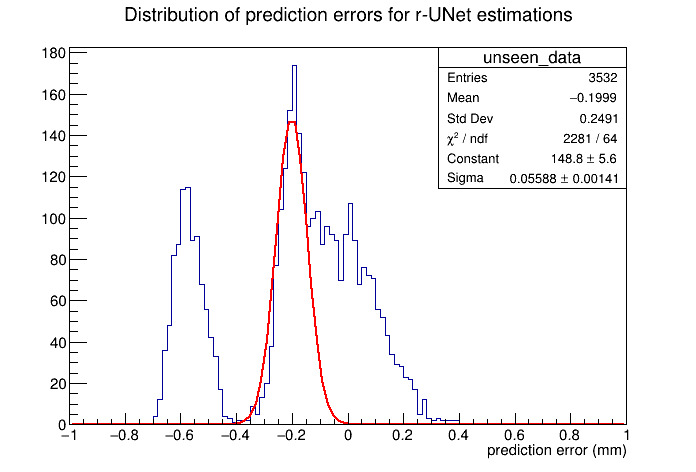

In [71]:
h, c = plot_vs_epochs(75, in_key = 'unseen',out_key='unseen_data')

predicted_unseen_6positions_5epochs_0.5coeff.npz 5
predicted_unseen_6positions_10epochs_0.5coeff.npz 10
predicted_unseen_6positions_15epochs_0.5coeff.npz 15
predicted_unseen_6positions_20epochs_0.5coeff.npz 20
predicted_unseen_6positions_25epochs_0.5coeff.npz 25
predicted_unseen_6positions_30epochs_0.5coeff.npz 30
predicted_unseen_6positions_35epochs_0.5coeff.npz 35
predicted_unseen_6positions_40epochs_0.5coeff.npz 40
predicted_unseen_6positions_45epochs_0.5coeff.npz 45
predicted_unseen_6positions_50epochs_0.5coeff.npz 50
 FCN=1141.37 FROM MIGRAD    STATUS=CONVERGED      64 CALLS          65 TOTAL
                     EDM=2.84938e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.51624e+01   6.92802e-01   8.57285e-03  -5.61761e-05
   2  Mean         1.01778e-03     fixed    
   3  Sigma        7.68594e-01   3.12395e-02   2.0510

Warning in <TROOT::Append>: Replacing existing TH1: unseen_data (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_unseen_data_tr6positions_5coeff_5epochs.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: unseen_data (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_unseen_data_tr6positions_5coeff_10epochs.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: unseen_data (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_unseen_data_tr6positions_5coeff_15epochs.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: unseen_data (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/yw18

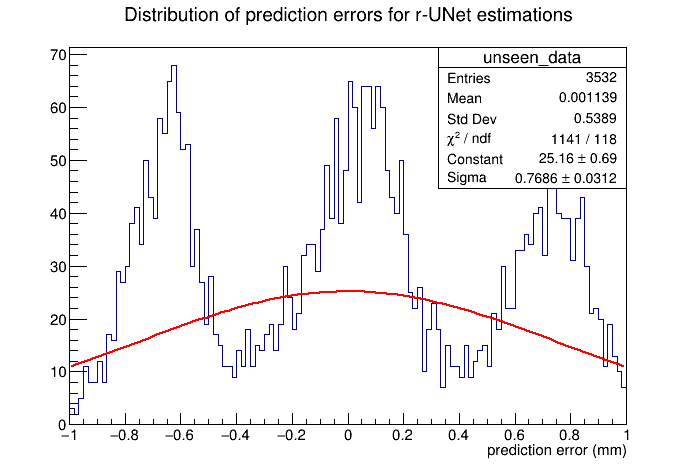

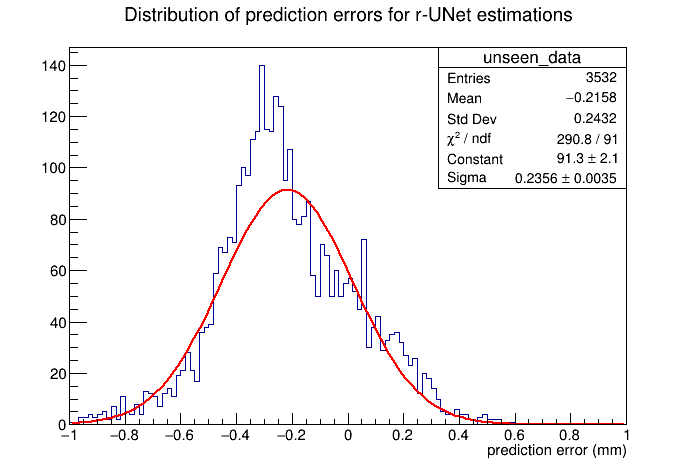

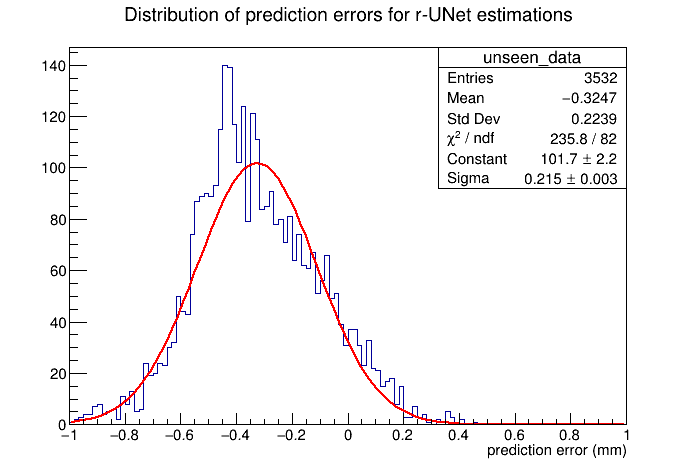

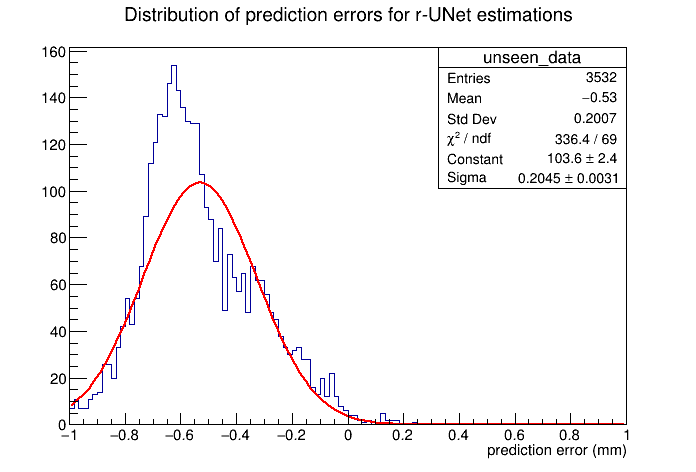

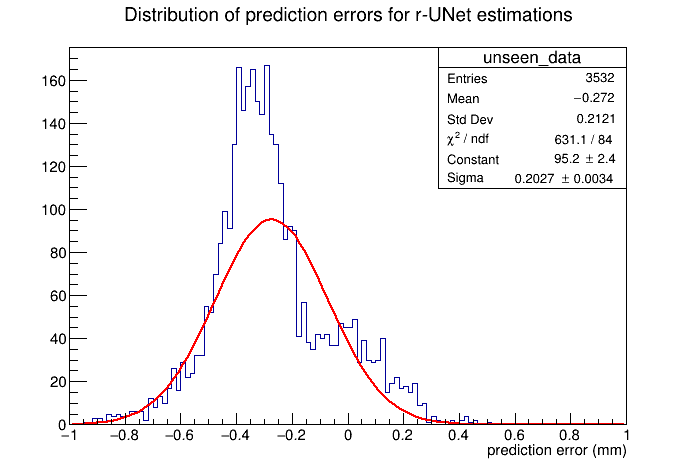

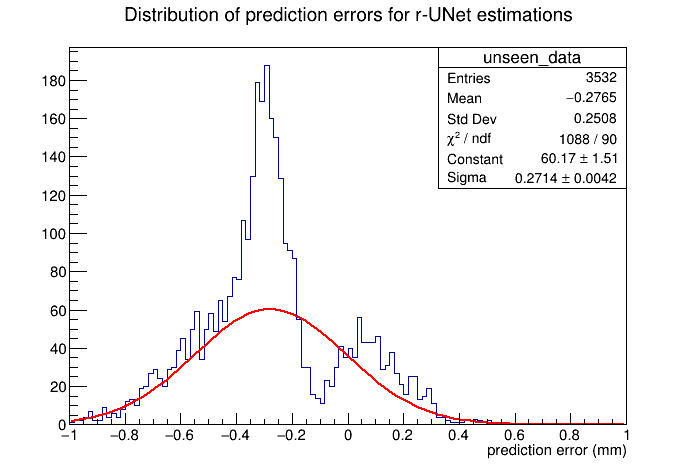

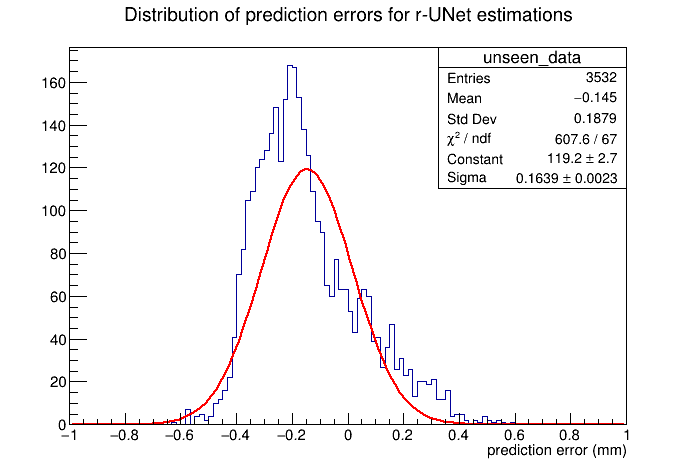

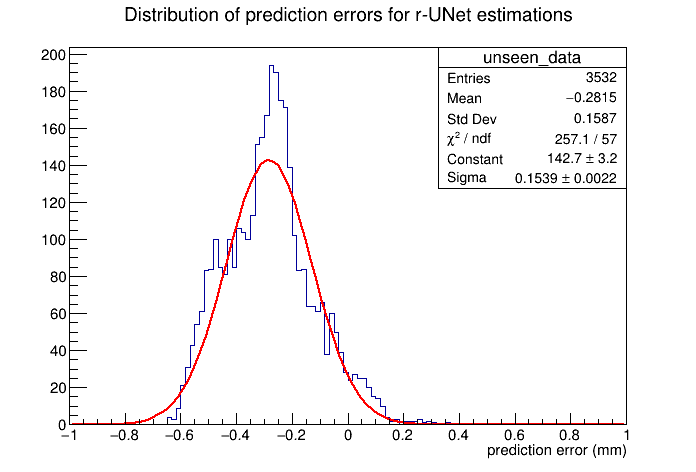

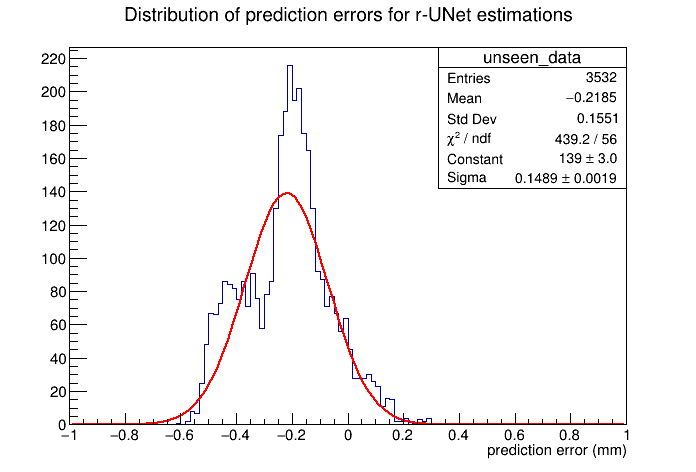

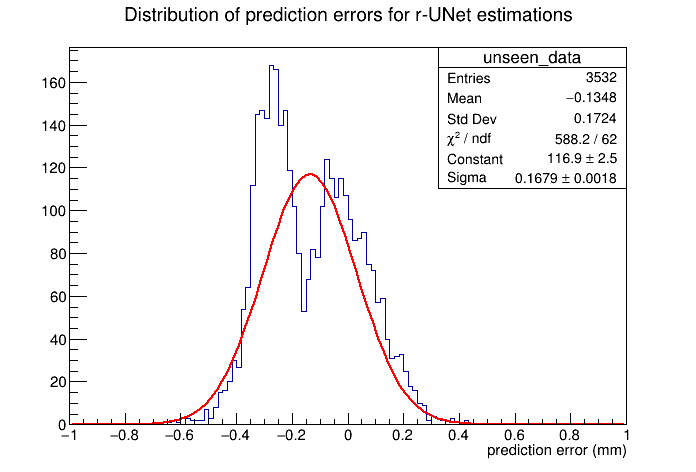

In [72]:
h, c = plot_vs_epochs(5, in_key = 'unseen', out_key='unseen_data')

predicted_testdata_6positions_5epochs_0.5coeff.npz 5
predicted_testdata_6positions_10epochs_0.5coeff.npz 10
predicted_testdata_6positions_15epochs_0.5coeff.npz 15
predicted_testdata_6positions_20epochs_0.5coeff.npz 20
predicted_testdata_6positions_25epochs_0.5coeff.npz 25
predicted_testdata_6positions_30epochs_0.5coeff.npz 30
predicted_testdata_6positions_35epochs_0.5coeff.npz 35
predicted_testdata_6positions_40epochs_0.5coeff.npz 40
predicted_testdata_6positions_45epochs_0.5coeff.npz 45
predicted_testdata_6positions_50epochs_0.5coeff.npz 50
 FCN=292.113 FROM MIGRAD    STATUS=CONVERGED      48 CALLS          49 TOTAL
                     EDM=1.13759e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.10041e+01   6.23066e-01   3.56147e-03  -1.44423e-03
   2  Mean         2.02205e-01     fixed    
   3  Sigma        4.33439e-01   

Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_test_data_tr6positions_5coeff_5epochs.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: test_data (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_test_data_tr6positions_5coeff_10epochs.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: test_data (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_test_data_tr6positions_5coeff_15epochs.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: test_data (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_test_data_tr

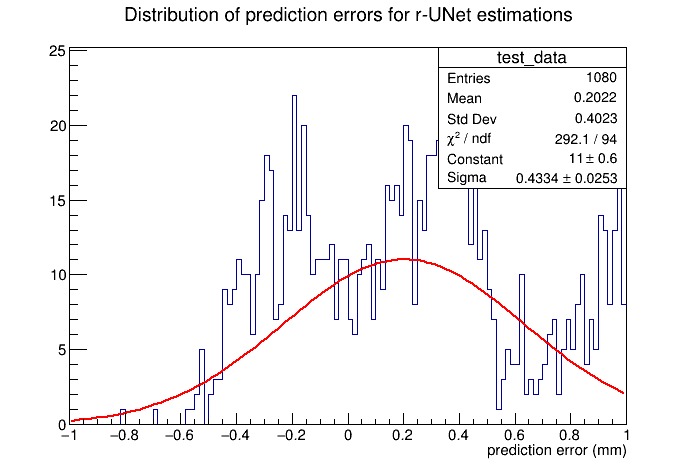

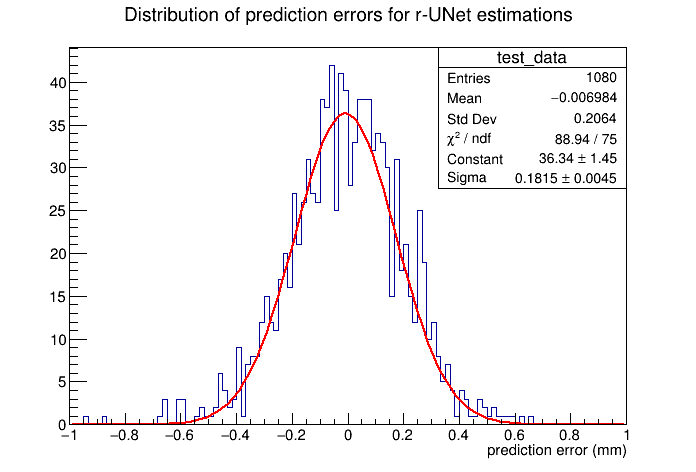

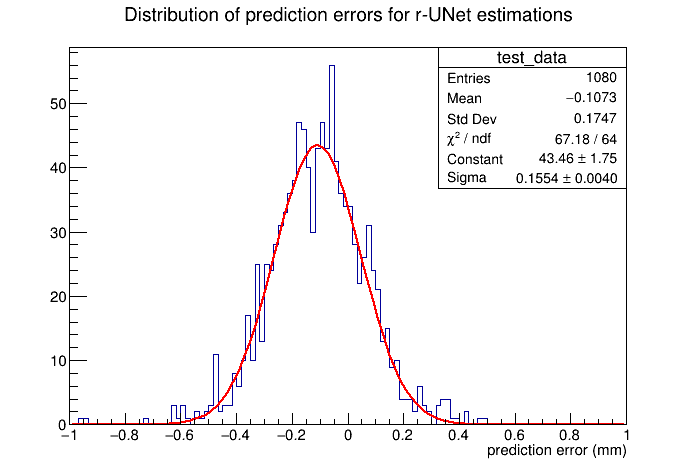

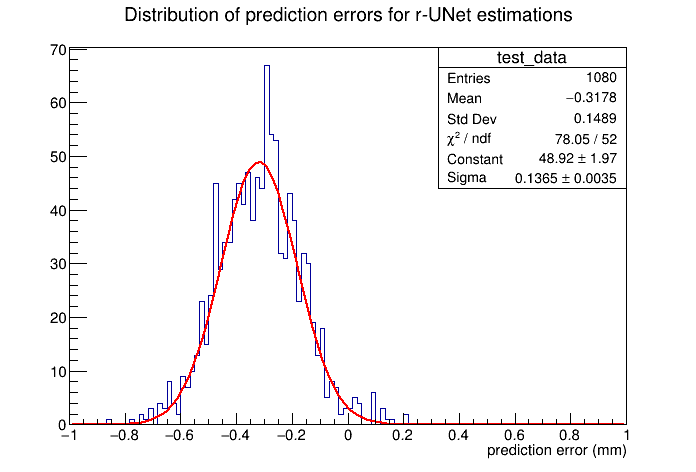

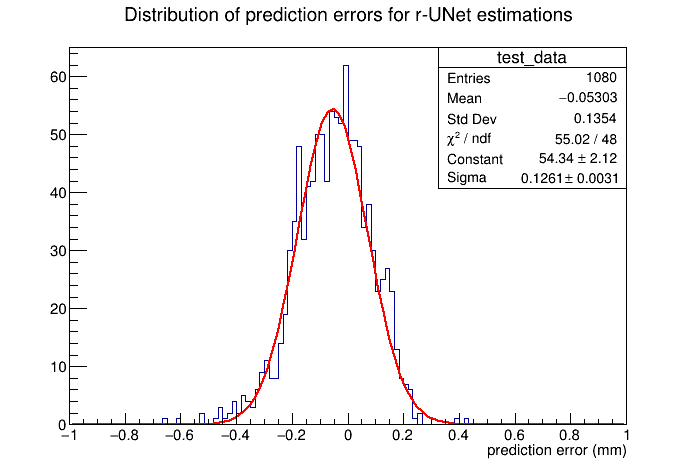

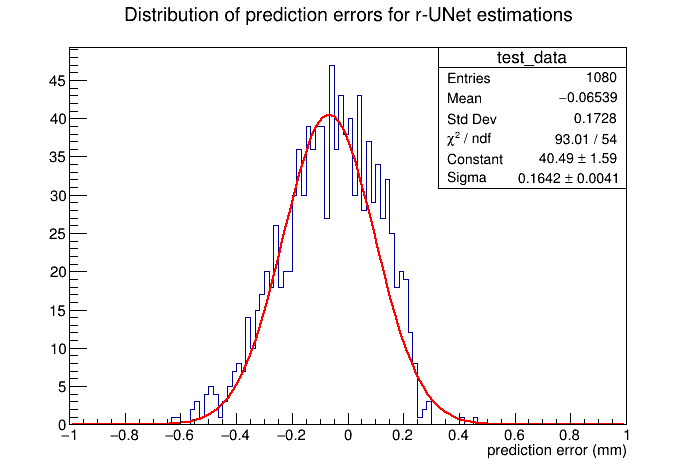

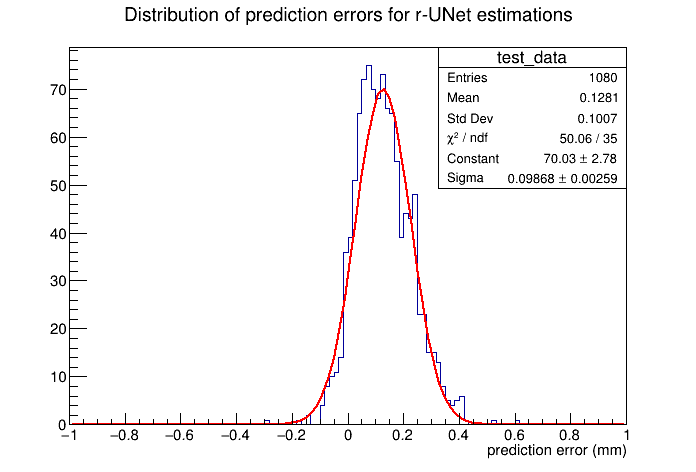

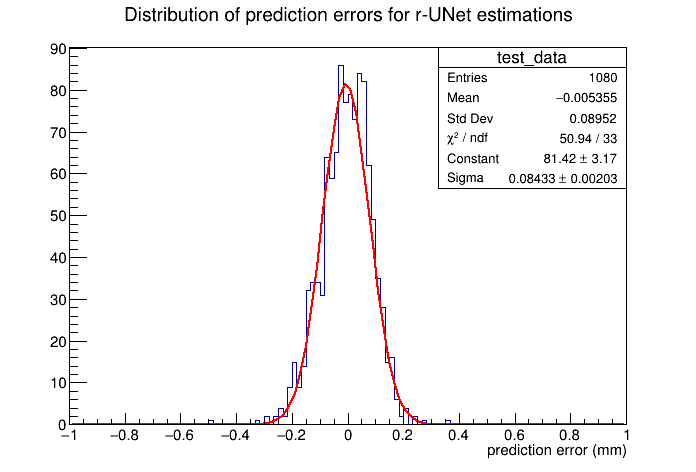

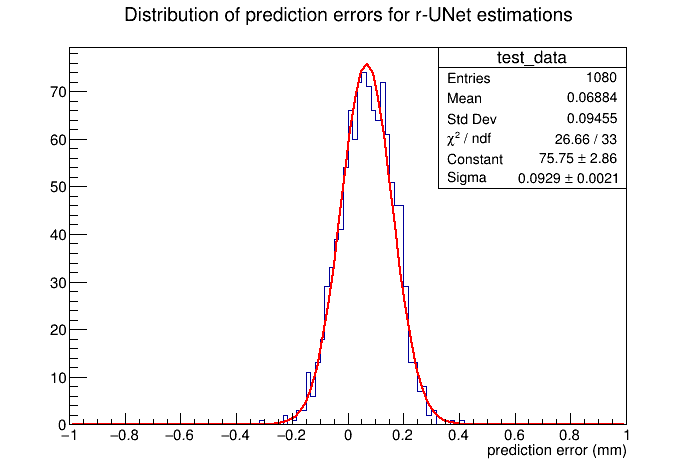

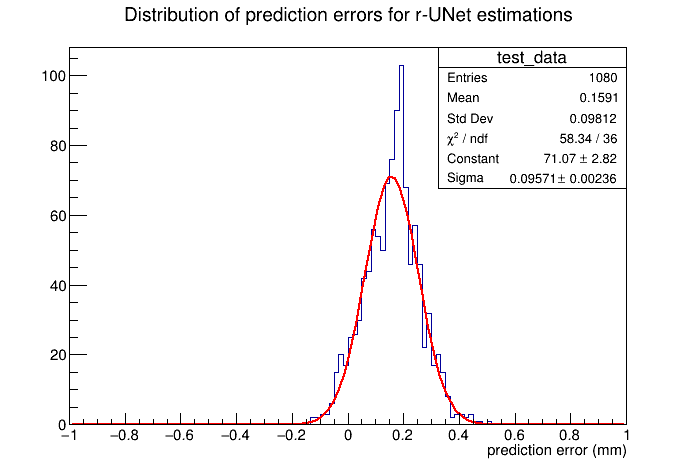

In [73]:
h, c = plot_vs_epochs(5, in_key = 'testdata', out_key='test_data')

In [32]:
def get_idx(arr, key):
    return np.where(arr==key)[0]

def idx_mse(dist, true_arr, preds_arr):
    idx = np.where(true_arr==dist)[0]
    mse = mean_squared_error(true_arr[idx], preds_arr[idx])
    print(dist, mse)
    return idx, mse 

In [33]:
def gaus_fit_dist(data_file, distances, keyword, fkey, save_file=True, 
                  n_bins = 10, histo_min = -1.0, histo_max = 1.0):
    data = np.load(data_file)
    true = data['true']
    preds = data['pred']
    for dist in distances:
        histo=None
        canvas=None
        idx = idx_mse(dist, preds_arr=preds, true_arr=true)[0]
        y_true = true[idx]
        y_pred = preds[idx]
        
        mean = np.mean(y_true-y_pred)
        histo = TH1F("{}_{}mm".format(keyword, dist),
                 "Distribution of prediction errors for r-UNet estimations", 
                 n_bins,histo_min,histo_max)
        for i in (y_true-y_pred):
            histo.Fill(i)
    
        canvas = TCanvas()
        f = TF1("f","gaus")
        f.FixParameter(1,mean)

        histo.Fit(f, "S")
        histo.GetXaxis().SetTitle("prediction error (mm)");
        yax=histo.GetYaxis()
        yax.SetLimits(0,500)
        #histo.SetAxisRange(0, 500,"y")
        #gStyle.SetOptStat("nmR")
        gStyle.SetOptFit()
        gStyle.SetStatY(0.9)
        gStyle.SetStatX(0.9)
        gStyle.SetStatW(0.15)
        gStyle.SetStatH(0.15)
        histo.Draw()
        canvas.Draw()
        if save_file:
            print("saving as: {}".format(os.path.join(saved_models, 'error_distributions',
                                   '_'.join(["TEST_{}mm".format(dist),fkey])+".png")))
            canvas.SaveAs(os.path.join(saved_models, 'error_distributions',
                                   '_'.join(["TEST_{}mm".format(dist),fkey])+".png"))
    return histo, canvas

1 0.2286817363045653
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_1mm_unseen_data_tr6positions_7coeff_50epochs.png
3 0.014231624406264064
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_3mm_unseen_data_tr6positions_7coeff_50epochs.png
15 0.0475158641323469
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_15mm_unseen_data_tr6positions_7coeff_50epochs.png
30 0.11663354459834711
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_30mm_unseen_data_tr6positions_7coeff_50epochs.png
 FCN=12.7994 FROM MIGRAD    STATUS=CONVERGED      37 CALLS          38 TOTAL
                     EDM=8.45375e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant  

Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_1mm_unseen_data_tr6positions_7coeff_50epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_3mm_unseen_data_tr6positions_7coeff_50epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_15mm_unseen_data_tr6positions_7coeff_50epochs.png has been created
Warning in <TROOT::Append>: Replacing existing TH1: unseen_data_30mm (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_30mm_unseen_data_tr6positions_7coeff_50epochs.png has been created


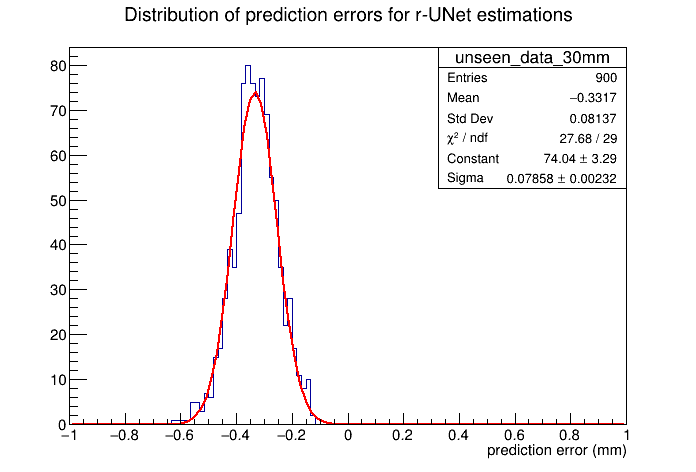

In [173]:
hist, canvas = gaus_fit_dist(os.path.join(saved_models,'predicted_unseen_6positions_50epochs_0.7coeff.npz'), 
                              distances = unseen_dist,
                              n_bins=120, save_file=True,
                              keyword='unseen_data', 
                              fkey='{}_tr6positions_{}coeff_{}epochs'.format('unseen_data', 
                              7, 50))


In [34]:
def plot_vs_dist(coeff, dist_list, in_key, out_key, epoch):

    f_list, _ = get_fnames(coeff, in_key)
    for fname in f_list:
        if int(regex.findall(fname.split("_")[3])[0])==epoch:
            print(fname)
            
       
            hist, canv = gaus_fit_dist(os.path.join(saved_models, fname), 
                                  distances = dist_list,
                                  n_bins=120, save_file=True,
                                  keyword=out_key, 
                                  fkey='{}_tr6positions_{}coeff_{}epochs'.format(out_key, 
                                  coeff, epoch))

    return #histos, canvases

In [ ]:
[2,4,10,20,25,35]

In [117]:
plot_vs_dist(75, in_key='testdata', out_key='', epoch=30)

2 0.16693954843064973
4 0.03136844986909019
10 0.1807475689710761
20 0.050838275950289766
25 0.07006307957052396
35 0.1451275393073684
2 0.03554547459367675
4 0.11839276868276809
10 0.09801824931091592
20 0.18930450588901535
25 0.2229808502061446
35 0.33302335132437644
2 0.012157837460179026
4 0.02563364110649453
10 0.017776016279005564
20 0.025835880727714578
25 0.026506477909407848
35 0.042556937694728014
2 0.018937872339539273
4 0.018642484258129085
10 0.01888439969720442
20 0.03267365857355289
25 0.041504104278567544
35 0.05506594734823033
2 0.026247485359148403
4 0.016400434162913296
10 0.013860945731333155
20 0.011305945258724963
25 0.012094689914349522
35 0.017229837340352955
predicted_testdata_6positions_30epochs_0.75coeff.npz
2 0.013493050236065363
4 0.024549273490714344
10 0.02116367542790935
20 0.02671029308769973
25 0.03237859206131978
35 0.033662035580986585
2 0.0032460159775996454
4 0.004757304727052179
10 0.008738892947339613
20 0.006926851463144336
25 0.0108413480225319

Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_2mm__tr6positions_75coeff_30epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_4mm__tr6positions_75coeff_30epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_10mm__tr6positions_75coeff_30epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_20mm__tr6positions_75coeff_30epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_25mm__tr6positions_75coeff_30epochs.png has been created
Info in <TCanvas::Print>: png fi

In [118]:
plot_vs_dist(6, in_key='testdata', out_key='', epoch=30)

2 0.13844147966491038
4 0.05003307665639399
10 0.06288718364788319
20 0.08131499004557954
25 0.12025520727752598
35 0.12322451715529437
2 0.02194192976078732
4 0.042400474505681775
10 0.02759747114705628
20 0.04191475867328636
25 0.039467788936047424
35 0.07347074167525484
2 0.04927947010085274
4 0.03666521419088061
10 0.030535632224233684
20 0.024292704496534437
25 0.023172109738838136
35 0.04312117513555693
2 0.02178798941866877
4 0.022576719254348402
10 0.021116852191767066
20 0.02208134683116821
25 0.022158934132467143
35 0.028216552079591097
2 0.018990446604478285
4 0.01625817853336564
10 0.013499678811257354
20 0.009363659026368603
25 0.00989976006650099
35 0.011730288834175831
predicted_testdata_6positions_30epochs_0.6coeff.npz
2 0.005725553611283605
4 0.0072124201249692006
10 0.008870669292169472
20 0.0058673389178163764
25 0.007263017450247713
35 0.007658647292542472
2 0.007138735962097407
4 0.007494398461640283
10 0.009358765818419101
20 0.009509688283807398
25 0.008900411953

Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_2mm__tr6positions_6coeff_30epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_4mm__tr6positions_6coeff_30epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_10mm__tr6positions_6coeff_30epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_20mm__tr6positions_6coeff_30epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_25mm__tr6positions_6coeff_30epochs.png has been created
Info in <TCanvas::Print>: png file /s

In [119]:
plot_vs_dist(7, in_key='testdata', out_key='', epoch=30)

2 0.2285120844021519
4 0.04019365227202735
10 0.3128240584976633
20 0.05486163562464744
25 0.10977929916315453
35 0.17857084321414057
2 0.018447325515452175
4 0.0596359587788387
10 0.03556539941251913
20 0.043548960379037174
25 0.047400853234732455
35 0.09004562611543172
2 0.022501743560619823
4 0.07617870502229082
10 0.05100627656867118
20 0.07975827130352488
25 0.07967544690999885
35 0.1427340126251502
2 0.01006279135083042
4 0.02353365176948379
10 0.018069976787070157
20 0.025689264340693987
25 0.02574665116470447
35 0.06389085245879875
2 0.011277158581586406
4 0.014496651650448248
10 0.01441343311041976
20 0.012339629306842364
25 0.01195298960248755
35 0.021617014335853908
predicted_testdata_6positions_30epochs_0.7coeff.npz
2 0.013752230385089485
4 0.012295507365833154
10 0.019246198809829213
20 0.021855078194726
25 0.026480209945276882
35 0.03662474164510952
2 0.02249432538592952
4 0.01722070303532946
10 0.02790512103827325
20 0.019842969304031264
25 0.016005187262593628
35 0.0224

Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_2mm__tr6positions_7coeff_30epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_4mm__tr6positions_7coeff_30epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_10mm__tr6positions_7coeff_30epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_20mm__tr6positions_7coeff_30epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_25mm__tr6positions_7coeff_30epochs.png has been created
Info in <TCanvas::Print>: png file /s

In [120]:
plot_vs_dist(5, in_key='testdata', out_key='', epoch=30)

2 0.08309309740356026
4 0.11989588324545092
10 1.0366178072766228
20 0.11939957610903239
25 0.05877826369488639
35 0.4694383817490136
2 0.016612974892157083
4 0.04833221961925362
10 0.024288737635302482
20 0.04347233754722785
25 0.04390726545386116
35 0.08548159517374303
2 0.032537597594049575
4 0.02759682622774037
10 0.03812875195460682
20 0.042596603063809725
25 0.04359773054947537
35 0.07031675987651441
2 0.11776953118733927
4 0.0842300308906459
10 0.14179337461945352
20 0.14679438406636727
25 0.1432744163769597
35 0.11369478889245367
2 0.008988603957578327
4 0.017690320523856187
10 0.015598099425256843
20 0.018981246811473375
25 0.022234814929817374
35 0.04625858387541762
predicted_testdata_6positions_30epochs_0.5coeff.npz
2 0.011943831044133983
4 0.022271783856192266
10 0.012404605516474968
20 0.01833743542672412
25 0.03506271697269454
35 0.11303139317182623
2 0.01841596039076251
4 0.04337782878167937
10 0.032780060970968826
20 0.022825918933929164
25 0.020260052550891007
35 0.021

Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_2mm__tr6positions_5coeff_30epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_4mm__tr6positions_5coeff_30epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_10mm__tr6positions_5coeff_30epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_20mm__tr6positions_5coeff_30epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/error_distribution_25mm__tr6positions_5coeff_30epochs.png has been created
Info in <TCanvas::Print>: png file /s

In [35]:
test_distances = [2,4,10,20,25,35]

In [38]:
for e in range(5, 105,  5):
    for coeff in [25]:
        plot_vs_dist(coeff, dist_list=test_distances, 
                     in_key='testdata', 
                     out_key='test_data', epoch=e)
    

predicted_testdata_6positions_5epochs_0.25coeff.npz
2 0.49030504178059364
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_2mm_test_data_tr6positions_25coeff_5epochs.png
4 0.05886801644076335
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_4mm_test_data_tr6positions_25coeff_5epochs.png
10 0.40955781823490006
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_10mm_test_data_tr6positions_25coeff_5epochs.png
20 0.15921124099713266
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_20mm_test_data_tr6positions_25coeff_5epochs.png
25 0.4545581602196762
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_25mm_test_data_tr6positions_25coeff_5epochs.png
35 0.1818741238087608
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_d

20 0.004863900488547028
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_20mm_test_data_tr6positions_25coeff_45epochs.png
25 0.005053092535391719
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_25mm_test_data_tr6positions_25coeff_45epochs.png
35 0.0038911468227920327
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_35mm_test_data_tr6positions_25coeff_45epochs.png
predicted_testdata_6positions_50epochs_0.25coeff.npz
2 0.0035190960285738466
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_2mm_test_data_tr6positions_25coeff_50epochs.png
4 0.005622256367660832
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_4mm_test_data_tr6positions_25coeff_50epochs.png
10 0.005968967703187158
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6p

4 0.0021250689552863838
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_4mm_test_data_tr6positions_25coeff_85epochs.png
10 0.002771975862769286
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_10mm_test_data_tr6positions_25coeff_85epochs.png
20 0.006296731152078123
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_20mm_test_data_tr6positions_25coeff_85epochs.png
25 0.008158908971480465
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_25mm_test_data_tr6positions_25coeff_85epochs.png
35 0.017522057489812774
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_35mm_test_data_tr6positions_25coeff_85epochs.png
predicted_testdata_6positions_90epochs_0.25coeff.npz
2 0.0029088639939944183
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6

Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_2mm_test_data_tr6positions_25coeff_5epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_4mm_test_data_tr6positions_25coeff_5epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_10mm_test_data_tr6positions_25coeff_5epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_20mm_test_data_tr6positions_25coeff_5epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_25mm_test_data_tr6positions_25coeff_5epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_r

In [36]:
unseen_dist = [1,3,15,30]

In [39]:
for e in range(5,105,5):
    for coeff in [25]:
        print(e, coeff)
        plot_vs_dist(coeff, dist_list=unseen_dist, in_key='unseen', out_key='unseen_data', epoch=e)


5 25
predicted_unseen_6positions_5epochs_0.25coeff.npz
1 1.3094332210897672
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_1mm_unseen_data_tr6positions_25coeff_5epochs.png
3 0.19403364096872827
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_3mm_unseen_data_tr6positions_25coeff_5epochs.png
15 0.13614396226244835
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_15mm_unseen_data_tr6positions_25coeff_5epochs.png
30 0.4978257262979928
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_30mm_unseen_data_tr6positions_25coeff_5epochs.png
10 25
predicted_unseen_6positions_10epochs_0.25coeff.npz
1 0.049178541432680946
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_1mm_unseen_data_tr6positions_25coeff_10epochs.png
3 0.09371335846002196
saving as: /

saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_3mm_unseen_data_tr6positions_25coeff_60epochs.png
15 0.005055682038760602
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_15mm_unseen_data_tr6positions_25coeff_60epochs.png
30 0.0869712107536826
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_30mm_unseen_data_tr6positions_25coeff_60epochs.png
65 25
predicted_unseen_6positions_65epochs_0.25coeff.npz
1 0.23625707970418078
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_1mm_unseen_data_tr6positions_25coeff_65epochs.png
3 0.012669077113899769
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_3mm_unseen_data_tr6positions_25coeff_65epochs.png
15 0.0035447569587267937
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_

Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_1mm_unseen_data_tr6positions_25coeff_5epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_3mm_unseen_data_tr6positions_25coeff_5epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_15mm_unseen_data_tr6positions_25coeff_5epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_30mm_unseen_data_tr6positions_25coeff_5epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_1mm_unseen_data_tr6positions_25coeff_10epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/

In [40]:
for e in [55]:
    for coeff in [5]:
        plot_vs_dist(coeff, dist_list=test_distances, 
                     in_key='testdata', 
                     out_key='test_data', epoch=e)
    

predicted_testdata_6positions_55epochs_0.5coeff.npz
2 0.018340652423307024
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_2mm_test_data_tr6positions_5coeff_55epochs.png
4 0.023963183748769153
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_4mm_test_data_tr6positions_5coeff_55epochs.png
10 0.020396492018963736
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_10mm_test_data_tr6positions_5coeff_55epochs.png
20 0.029189986571549486
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_20mm_test_data_tr6positions_5coeff_55epochs.png
25 0.04730410448561303
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_25mm_test_data_tr6positions_5coeff_55epochs.png
35 0.11940526740493945
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/e

Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_2mm_test_data_tr6positions_5coeff_55epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_4mm_test_data_tr6positions_5coeff_55epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_10mm_test_data_tr6positions_5coeff_55epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_20mm_test_data_tr6positions_5coeff_55epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_25mm_test_data_tr6positions_5coeff_55epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_r

In [41]:
for e in [55]:
    for coeff in [5]:
        print(e, coeff)
        plot_vs_dist(coeff, dist_list=unseen_dist, in_key='unseen', out_key='unseen_data', epoch=e)



55 5
predicted_unseen_6positions_55epochs_0.5coeff.npz
1 0.10725526988485204
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_1mm_unseen_data_tr6positions_5coeff_55epochs.png
3 0.021045900420130572
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_3mm_unseen_data_tr6positions_5coeff_55epochs.png
15 0.01412413165153541
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_15mm_unseen_data_tr6positions_5coeff_55epochs.png
30 0.00836011290245046
saving as: /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_30mm_unseen_data_tr6positions_5coeff_55epochs.png
 FCN=50.7024 FROM MIGRAD    STATUS=CONVERGED      36 CALLS          37 TOTAL
                     EDM=9.00772e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE        

Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_1mm_unseen_data_tr6positions_5coeff_55epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_3mm_unseen_data_tr6positions_5coeff_55epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_15mm_unseen_data_tr6positions_5coeff_55epochs.png has been created
Info in <TCanvas::Print>: png file /storage/yw18581/src/leaf_reco/saved_models/trained_6positions/error_distributions/TEST_30mm_unseen_data_tr6positions_5coeff_55epochs.png has been created
